# Drug consumption
**dataset**: https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29

**Authors**:
- Louis Ponce
- Gabriel Vanish
- Jonathan Sands

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import matplotlib as mpl
import math
from scipy.stats import pearsonr, spearmanr, chi2_contingency, ttest_ind, mannwhitneyu, norm, normaltest, shapiro, anderson
import operator
from IPython.display import HTML, display
import seaborn as sns

In [2]:
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
#hide
%config IPCompleter.greedy=True

# Dataset preparation

The drug consumption data comes from the [UCI Machine learning repository](http://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29).

The dataset contains records for 1885 respondents.

To summarize, it contains:
- an ID column
- 5 demographic columns (features)
- 7 personality traits (features)
- 18 drugs with their usage frequency (target)
- a fake drug called Semeron to verify reliability of answers

Each drug variable can take 6 different values:
- CL0 Never Used 
- CL1 Used over a Decade
- CL2 Used in Last Decade
- CL3 Used in Last Year
- CL4 Used in Last Month
- CL5 Used in Last Week
- CL6 Used in Last Day

All qualitative variables where transformed to real values (except for the target variables). Read the [dataset description](http://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29) for more details

In [4]:
demographic_columns = [
    'Age', 
    'Gender', 
    'Education', 
    'Country',
    'Ethnicity',
]

personality_columns = [
    'Neuroticism',
    'Extraversion',
    'Openness to experience',
    'Agreeableness',
    'Conscientiousness',
    'Impulsiveness',
    'Sensation seeking'
]

feature_columns = demographic_columns + personality_columns

drugs_columns = [
    'Alcohol consumption',
    'Amphetamines consumption',
    'Amyl nitrite consumption',
    'Benzodiazepine consumption',
    'Caffeine consumption',
    'Cannabis consumption',
    'Chocolate consumption',
    'Cocaine consumption',
    'Crack consumption',
    'Ecstasy consumption',
    'Heroin consumption',
    'Ketamine consumption',
    'Legal highs consumption',
    'Lysergic acid diethylamide consumption',
    'Methadone consumption',
    'Magic mushrooms consumption',
    'Nicotine consumption',
    'Fictitious drug Semeron consumption',
    'Volatile substance abuse consumption'
]

all_columns = feature_columns + drugs_columns

## Loading the dataset

In [5]:
dataset = pd.read_csv("drug_consumption.data", names=["ID"] + all_columns)

In [6]:
dataset = dataset.set_index("ID")

In [7]:
dataset.head()

Age   Gender  Education  Country  Ethnicity  Neuroticism  \
ID                                                                 
1   0.49788  0.48246   -0.05921  0.96082    0.12600      0.31287   
2  -0.07854 -0.48246    1.98437  0.96082   -0.31685     -0.67825   
3   0.49788 -0.48246   -0.05921  0.96082   -0.31685     -0.46725   
4  -0.95197  0.48246    1.16365  0.96082   -0.31685     -0.14882   
5   0.49788  0.48246    1.98437  0.96082   -0.31685      0.73545   

    Extraversion  Openness to experience  Agreeableness  Conscientiousness  \
ID                                                                           
1       -0.57545                -0.58331       -0.91699           -0.00665   
2        1.93886                 1.43533        0.76096           -0.14277   
3        0.80523                -0.84732       -1.62090           -1.01450   
4       -0.80615                -0.01928        0.59042            0.58489   
5       -1.63340                -0.45174       -0.30172            1.30612   

    ...  Ecstasy consumption  Heroin consumption Ketamine consumption  \
ID  ...                                                                 
1   ...                  CL0                 CL0                  CL0   
2   ...                  CL4                 CL0                  CL2   
3   ...                  CL0                 CL0                  CL0   
4   ...                  CL0                 CL0                  CL2   
5   ...                  CL1                 CL0                  CL0   

   Legal highs consumption Lysergic acid diethylamide consumption  \
ID                                                                  
1                      CL0                                    CL0   
2                      CL0                                    CL2   
3                      CL0                                    CL0   
4                      CL0                                    CL0   
5                      CL1                                    CL0   

   Methadone consumption Magic mushrooms consumption Nicotine consumption  \
ID                                                                          
1                    CL0                         CL0                  CL2   
2                    CL3                         CL0                  CL4   
3                    CL0                         CL1                  CL0   
4                    CL0                         CL0                  CL2   
5                    CL0                         CL2                  CL2   

   Fictitious drug Semeron consumption Volatile substance abuse consumption  
ID                                                                           
1                                  CL0                                  CL0  
2                                  CL0                                  CL0  
3                                  CL0                                  CL0  
4                                  CL0                                  CL0  
5                                  CL0                                  CL0  

[5 rows x 31 columns]

In [8]:
dataset.dtypes

Age                                       float64
Gender                                    float64
Education                                 float64
Country                                   float64
Ethnicity                                 float64
Neuroticism                               float64
Extraversion                              float64
Openness to experience                    float64
Agreeableness                             float64
Conscientiousness                         float64
Impulsiveness                             float64
Sensation seeking                         float64
Alcohol consumption                        object
Amphetamines consumption                   object
Amyl nitrite consumption                   object
Benzodiazepine consumption                 object
Caffeine consumption                       object
Cannabis consumption                       object
Chocolate consumption                      object
Cocaine consumption                        object


Features are all floats and targets are objects

In [9]:
dataset.shape

(1885, 31)

In [10]:
dataset.isnull().values.any()

False

No missing values

## Nominal drug to ordinal data

In [11]:
for i in drugs_columns:
    dataset[i] = dataset[i].map({'CL0': 0, 'CL1': 1, 'CL2': 2, 'CL3': 3, 'CL4': 4, 'CL5': 5, 'CL6': 6})

Mapping CLX to X.

## Removing Seremon users

In [12]:
semerons = dataset[dataset['Fictitious drug Semeron consumption'] != 0]
semerons

Age   Gender  Education  Country  Ethnicity  Neuroticism  \
ID                                                                   
730  -0.07854  0.48246   -1.73790 -0.09765   -0.31685     -0.58016   
821  -0.95197 -0.48246   -0.61113 -0.09765   -0.50212     -0.67825   
1520 -0.95197 -0.48246   -0.61113 -0.57009   -0.31685     -0.24649   
1537 -0.95197  0.48246   -0.61113 -0.57009    0.11440     -0.46725   
1702  0.49788  0.48246    0.45468 -0.57009   -0.31685      1.98437   
1773 -0.95197 -0.48246   -1.22751 -0.57009   -0.22166     -0.34799   
1810 -0.95197  0.48246   -1.43719 -0.57009   -0.31685      1.23461   
1827 -0.95197  0.48246    0.45468 -0.57009   -0.31685      0.22393   

      Extraversion  Openness to experience  Agreeableness  Conscientiousness  \
ID                                                                             
730        0.32197                 0.14143       -0.60633            0.12331   
821        1.74091                 0.72330        0.13136            0.41594   
1520      -0.80615                -1.27553       -1.34289           -1.92173   
1537       0.80523                 0.29338        2.03972            1.81175   
1702      -0.80615                 2.15324        0.76096           -0.00665   
1773       1.28610                 1.06238       -0.01729           -0.52745   
1810       1.11406                 1.06238       -1.47955            0.12331   
1827      -0.30033                 0.88309        1.28610           -0.00665   

      ...  Ecstasy consumption  Heroin consumption  Ketamine consumption  \
ID    ...                                                                  
730   ...                    2                   2                     2   
821   ...                    3                   0                     0   
1520  ...                    1                   2                     1   
1537  ...                    4                   0                     4   
1702  ...                    2                   0                     2   
1773  ...                    3                   0                     4   
1810  ...                    4                   2                     1   
1827  ...                    0                   0                     0   

      Legal highs consumption  Lysergic acid diethylamide consumption  \
ID                                                                      
730                         0                                       4   
821                         0                                       5   
1520                        2                                       1   
1537                        3                                       2   
1702                        2                                       2   
1773                        3                                       6   
1810                        4                                       1   
1827                        2                                       3   

      Methadone consumption  Magic mushrooms consumption  \
ID                                                         
730                       2                            6   
821                       0                            5   
1520                      2                            4   
1537                      0                            3   
1702                      0                            2   
1773                      3                            3   
1810                      0                            1   
1827                      0                            3   

      Nicotine consumption  Fictitious drug Semeron consumption  \
ID                                                                
730                      6                                    2   
821                      4                                    3   
1520                     2                                    3   
1537                     4                                    4   
1702         

There are 8 people that lied about taking Seremon, which is a **fake drug**, so we should remove them.

In [13]:
dataset = dataset[dataset['Fictitious drug Semeron consumption'] == 0]
drugs_columns.remove('Fictitious drug Semeron consumption')
dataset.drop(columns='Fictitious drug Semeron consumption')
dataset.shape

(1877, 31)

We have 1877 respondents left.

# Exploratory Data analysis

In [14]:
dataset.describe()

Age       Gender    Education      Country    Ethnicity  \
count  1877.000000  1877.000000  1877.000000  1877.000000  1877.000000   
mean      0.037577    -0.000771    -0.000984     0.358984    -0.309728   
std       0.878387     0.482588     0.949831     0.699707     0.166220   
min      -0.951970    -0.482460    -2.435910    -0.570090    -1.107020   
25%      -0.951970    -0.482460    -0.611130    -0.570090    -0.316850   
50%      -0.078540    -0.482460    -0.059210     0.960820    -0.316850   
75%       0.497880     0.482460     0.454680     0.960820    -0.316850   
max       2.591710     0.482460     1.984370     0.960820     1.907250   

       Neuroticism  Extraversion  Openness to experience  Agreeableness  \
count  1877.000000   1877.000000             1877.000000    1877.000000   
mean     -0.000551     -0.001951               -0.003224      -0.000657   
std       0.998442      0.997418                0.995691       0.996689   
min      -3.464360     -3.273930               -3.273930      -3.464360   
25%      -0.678250     -0.695090               -0.717270      -0.606330   
50%       0.042570      0.003320               -0.019280      -0.017290   
75%       0.629670      0.637790                0.723300       0.760960   
max       3.273930      3.273930                2.901610       3.464360   

       Conscientiousness  ...  Ecstasy consumption  Heroin consumption  \
count        1877.000000  ...          1877.000000         1877.000000   
mean           -0.000394  ...             1.309536            0.372403   
std             0.997657  ...             1.647373            1.034761   
min            -3.464360  ...             0.000000            0.000000   
25%            -0.652530  ...             0.000000            0.000000   
50%            -0.006650  ...             0.000000            0.000000   
75%             0.584890  ...             3.000000            0.000000   
max             3.464360  ...             6.000000            6.000000   

       Ketamine consumption  Legal highs consumption  \
count           1877.000000              1877.000000   
mean               0.564198                 1.353223   
std                1.216341                 1.790881   
min                0.000000                 0.000000   
25%                0.000000                 0.000000   
50%                0.000000                 0.000000   
75%                0.000000                 3.000000   
max                6.000000                 6.000000   

       Lysergic acid diethylamide consumption  Methadone consumption  \
count                             1877.000000            1877.000000   
mean                                 1.053277               0.826319   
std                                  1.484582               1.648379   
min                                  0.000000               0.000000   
25%                                  0.000000               0.000000   
50%                                  0.000000               0.000000   
75%                                  2.000000               0.000000   
max                                  6.000000               6.000000   

       Magic mushrooms consumption  Nicotine consumption  \
count                  1877.000000           1877.000000   
mean                      1.177944              3.194992   
std                       1.459212              2.415814   
min                       0.000000              0.000000   
25%                       0.000000              1.000000   
50%                       0.000000              3.000000   
75%                       2.000000              6.000000   
max                       6.000000              6.000000   

       Fictitious drug Semeron consumption  \
count                               1877.0   
mean                                   0.0   
std                                    0.0   
min                                    0.0   
25%                                    0.0   
50%                               

Let's create a plot to visualize the above table better

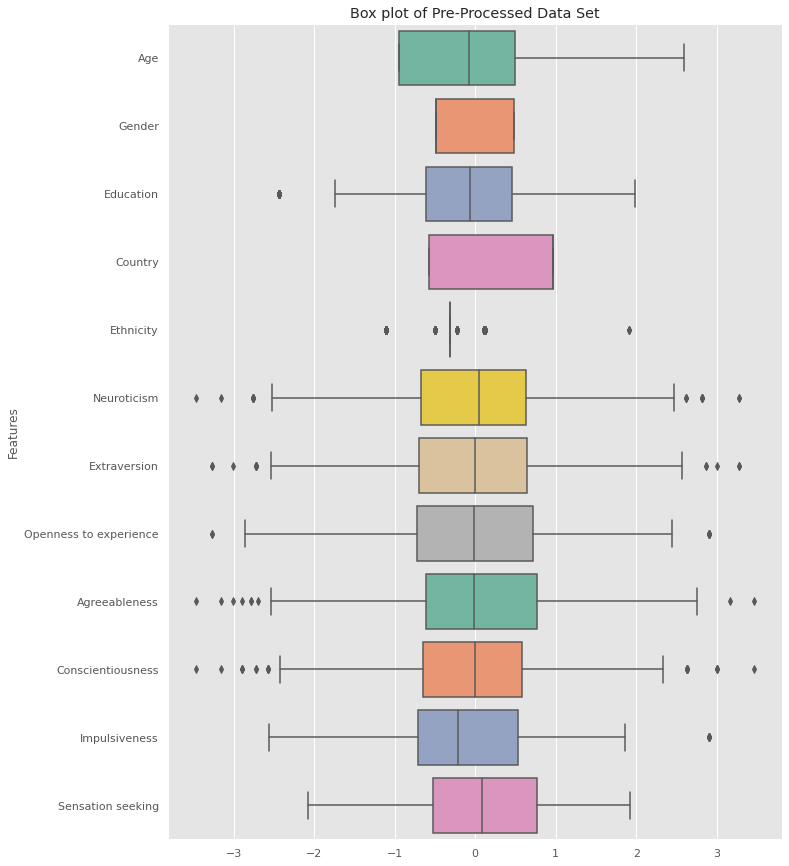

In [15]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(11,15))
plt.ylabel("Features")
plt.title("Box plot of Pre-Processed Data Set")
ax = sns.boxplot(data = dataset[feature_columns], orient="h", palette="Set2")

In [16]:
#hide
sns.reset_orig()

Seems like the dataset creators centered features around 0 and chose a small std (around 1) for the features, so we won't scale or center the data and keep the dataset creator's transformation.

## Demographic data analysis

For data analysis, we will transformed the quantified categorical data back to a a clearer, nominal, form.

### Rearranging data

Let us map the demographic values to something humanly understandable (based on [dataset description](https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29))

In [17]:
demo_data = dataset.copy()

In [18]:
age = ['18-24' if a <= -0.9 else 
       '25-34' if a >= -0.5 and a < 0 else 
       '35-44' if a > 0 and a < 1 else 
       '45-54' if a > 1 and a < 1.5 else 
       '55-64' if a > 1.5 and a < 2 else 
       '65+' 
       for a in demo_data['Age']]

gender = ['Female' if g > 0 else "Male" for g in demo_data['Gender']]

education = ['Left school before 16 years' if e <-2 else 
             'Left school at 16 years' if e > -2 and e < -1.5 else 
             'Left school at 17 years' if e > -1.5 and e < -1.4 else 
             'Left school at 18 years' if e > -1.4 and e < -1 else 
             'Some college or university, no certificate or degree' if e > -1 and e < -0.5 else 
             'Professional certificate/ diploma' if e > -0.5 and e < 0 else 
             'University degree' if e > 0 and e < 0.5 else 
             'Masters degree' if e > 0.5 and e < 1.5 else 
             'Doctorate degree' 
             for e in demo_data['Education']]

country = ['USA' if c < -0.5 else 
           'New Zealand' if c > -0.5 and c < -0.4 else 
           'Other' if c > -0.4 and c < -0.2 else 
           'Australia' if c > -0.2 and c < 0 else 
           'Ireland' if c > 0 and c < 0.23 else 
           'Canada' if c > 0.23 and c < 0.9 else 
           'UK' 
           for c in demo_data['Country']]

ethnicity = ['Black' if e < -1 else 
             'Asian' if e > -1 and e < -0.4 else 
             'White' if e > -0.4 and e < -0.25 else 
             'Mixed-White/Black' if e >= -0.25 and e < 0.11 else 
             'Mixed-White/Asian' if e > 0.12 and e < 1 else 
             'Mixed-Black/Asian' if e > 1.9 else 
             'Other' 
             for e in demo_data['Ethnicity']]


demo_data['Age'] = age
demo_data['Gender'] = gender
demo_data['Education'] = education
demo_data['Country'] = country
demo_data['Ethnicity'] = ethnicity

In [19]:
demo_data[demographic_columns].head()

Age  Gender                          Education Country  \
ID                                                             
1   35-44  Female  Professional certificate/ diploma      UK   
2   25-34    Male                   Doctorate degree      UK   
3   35-44    Male  Professional certificate/ diploma      UK   
4   18-24  Female                     Masters degree      UK   
5   35-44  Female                   Doctorate degree      UK   

            Ethnicity  
ID                     
1   Mixed-White/Asian  
2               White  
3               White  
4               White  
5               White

### Proportion analysis

Let's take a look at the demographic data balance

We first define a few useful functions that will be reused throughout this analysis.

In [20]:
def plot_pies(dataset, columns=None, fig_title="Pie plots"):
    if columns is None:
        columns = dataset.columns
    
    ''' Plot a pie chart for the selected columns of a dataset. '''
    ncols, nrows = 2, math.ceil(len(columns) / 2)
    plt.rc('xtick', labelsize=30)
    plt.rc('ytick', labelsize=30)
    plt.rc('figure', titlesize=50)

    fig, axes = plt.subplots(figsize=(20*ncols, 20*nrows), nrows=nrows, ncols=ncols, sharey=True)
    fig.suptitle(fig_title)
    
    for index, target in enumerate(columns):
        i, j = index // ncols, index % ncols
        ax = dataset[target].value_counts().plot(kind='pie', ax=axes[i, j])
        ax.set_title(target, fontdict={'fontsize':40})
        ax.set_ylabel("")
    
    for empty in range(len(columns), ncols * nrows):
        i, j = empty // ncols, empty % ncols
        axes[i,j].axis("off")
    plt.tight_layout()
    sns.reset_orig()

In [21]:
def plot_counts(dataset, columns = None, order = None, show_percent=True, fig_title="Count/Frequency plots", rotate_label = True, add_args=dict()):
    if columns is None:
        columns = dataset.columns
    
    ncount = len(dataset)

    ncols, nrows = 2, math.ceil(len(columns) / 2)
    plt.rc('xtick', labelsize=30)
    plt.rc('axes', labelsize=40)
    plt.rc('legend', fontsize=40, title_fontsize=0)
    fig, axes = plt.subplots(figsize=(20*ncols, 20*nrows), nrows=nrows, ncols=ncols, sharey=True)
    fig.suptitle(fig_title + "\n\n", fontsize=50)
    
    for index, col in enumerate(columns):
        i, j = index // ncols, index % ncols
        ax = sns.countplot(data=dataset, x=col, ax=axes[i,j], order=order if order is not None else np.sort(dataset[col].unique()), **add_args)
    
        ax2 = ax.twinx()
        ax2.yaxis.tick_left()
        ax.yaxis.tick_right()
        ax.yaxis.set_label_position('right')
        ax2.yaxis.set_label_position('left')
        ax2.set_ylabel('Frequency [%]')
    
        if show_percent:
            for p in ax.patches:
                x=p.get_bbox().get_points()[:,0]
                y=p.get_bbox().get_points()[1,1]
                if not math.isnan(x.mean()) and not math.isnan(y):
                    ax.text(x.mean(), y, '{:.1f}%'.format(100.*y/ncount), fontproperties=mpl.font_manager.FontProperties(size=30), 
                        ha='center', va='bottom')
    
        ax.yaxis.set_major_locator(ticker.LinearLocator(11))
        ax.yaxis.set_tick_params(which="major", labelsize=30)
    
        ax2.set_ylim(0,100)
        ax.set_ylim(0,ncount)
    
        ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))
        ax2.yaxis.set_tick_params(which="major", labelsize=30)

        ax2.grid(None)
        ax.set_xlabel("")
        if rotate_label:
            _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
        ax.set_title(col, fontdict={'fontsize':40})

    for empty in range(len(columns), ncols * nrows):
        i, j = empty // ncols, empty % ncols
        axes[i,j].axis("off")

    plt.tight_layout()
    sns.reset_orig()

Let's create pie plots and count plots.

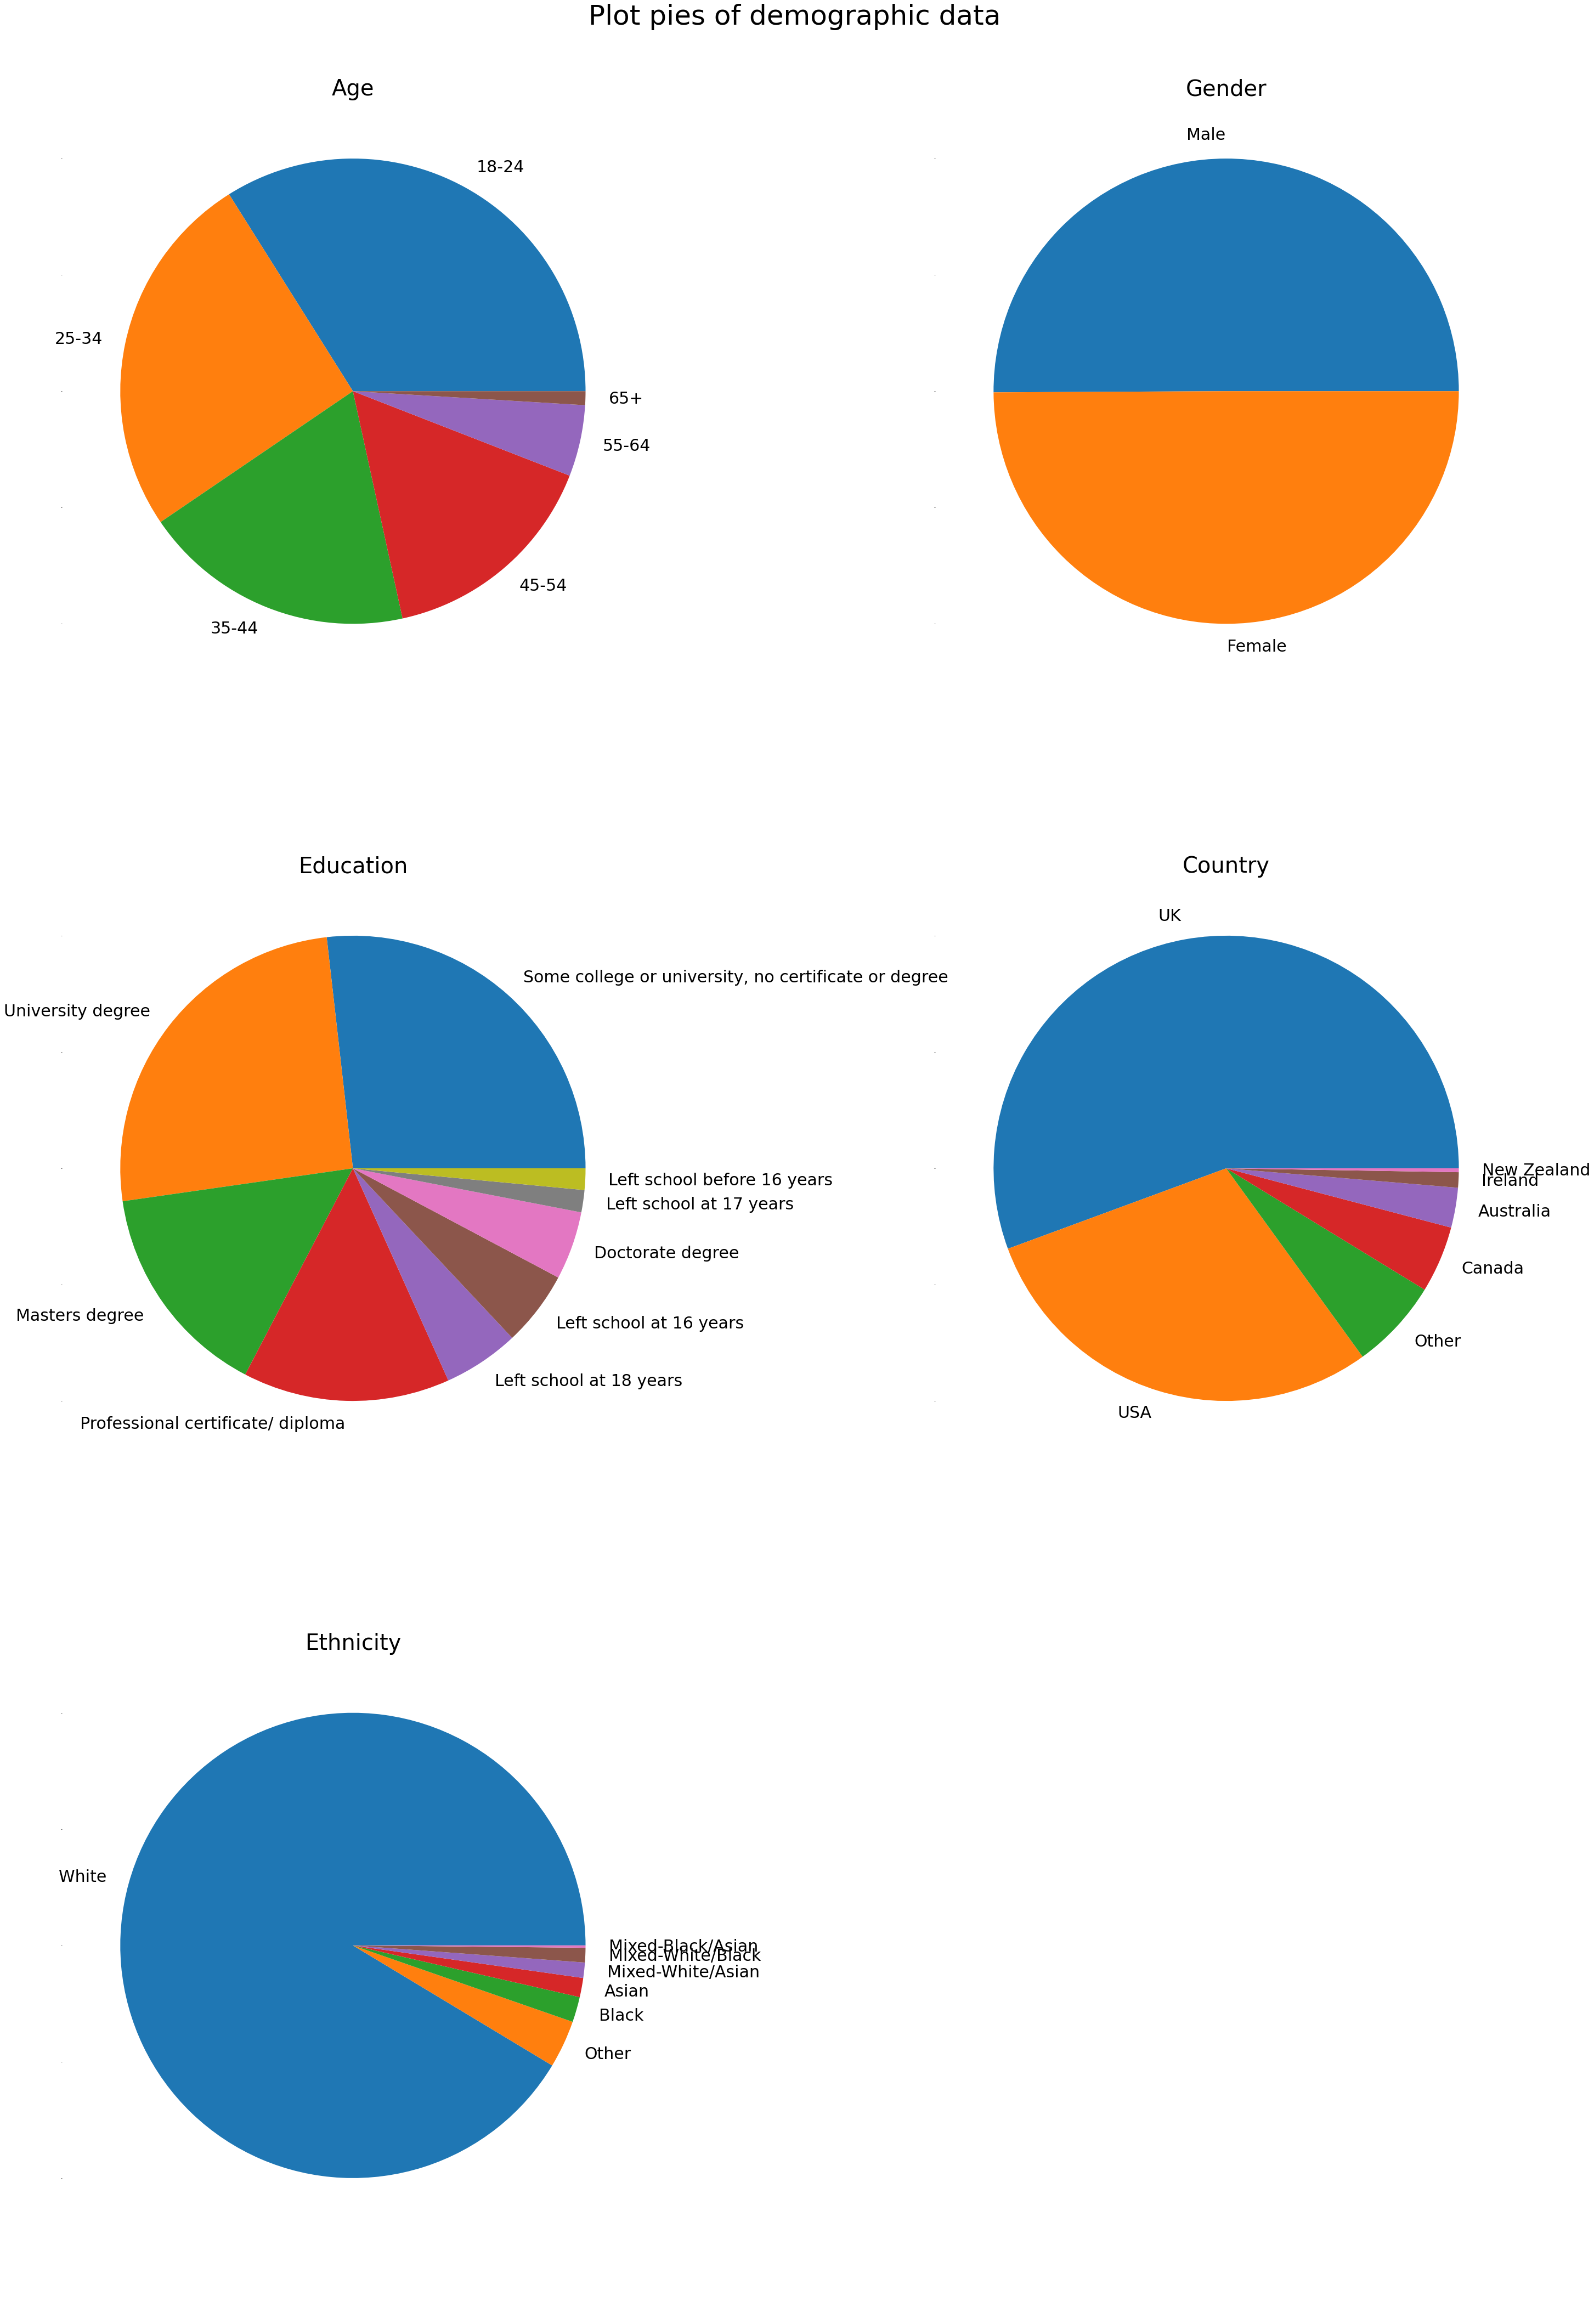

In [22]:
plot_pies(demo_data, demographic_columns, fig_title="Plot pies of demographic data")

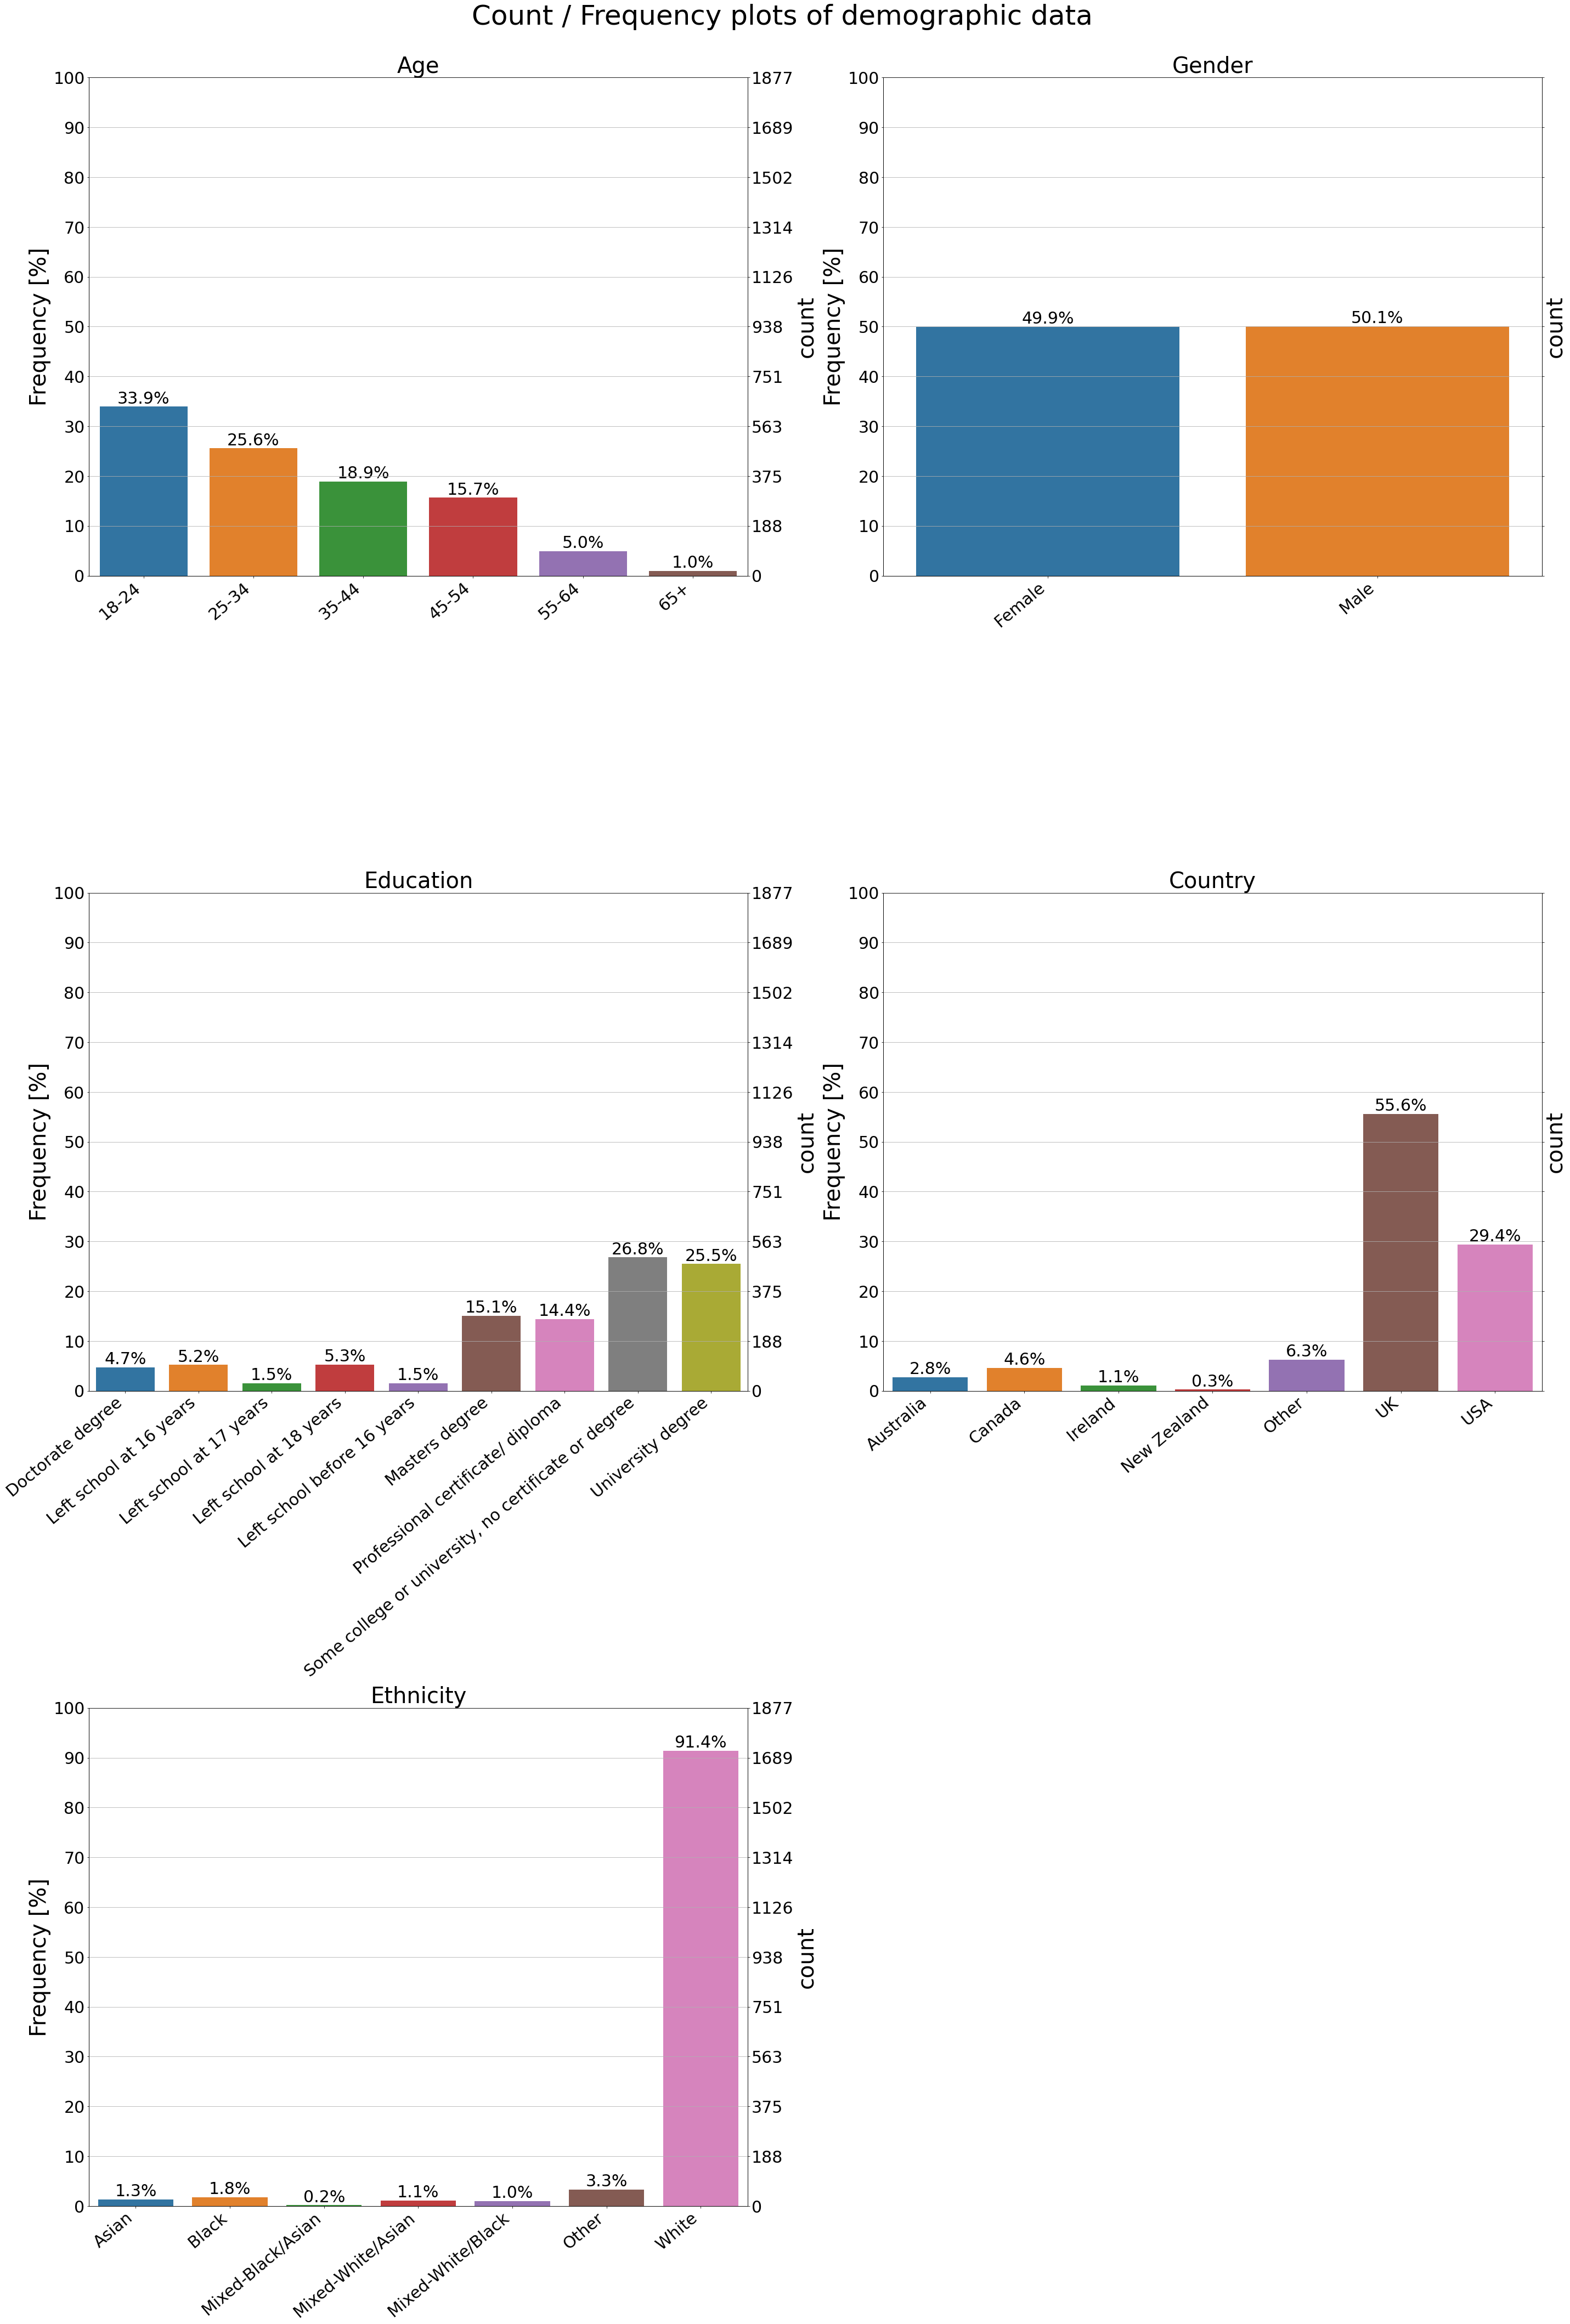

In [23]:
plot_counts(demo_data, demographic_columns, fig_title="Count / Frequency plots of demographic data")

We can see some features are **pretty balanced** but in some cases, classes are **underrepresented**. We will go over each of them in more detail.

In [24]:
def value_counts_percentage(dataset, column):
    ''' value.counts() method extended by displaying percentage '''
    
    a = dataset[column].value_counts()
    b = dataset[column].value_counts(normalize=True) * 100
    
    return pd.concat([a,b.round(2)], axis=1, keys=['N', '%'])

### Age

In [25]:
value_counts_percentage(demo_data, 'Age')

N      %
18-24  637  33.94
25-34  480  25.57
35-44  355  18.91
45-54  294  15.66
55-64   93   4.95
65+     18   0.96

The age groups are **intervals of around 10 years**. As we can see, the older the age group, the less represented they are.

The **18-24 group holds around 1/3 of all respondents** !

### Gender

In [26]:
value_counts_percentage(demo_data, 'Gender')

N      %
Male    940  50.08
Female  937  49.92

Gender is **balanced**.

### Education

In [27]:
value_counts_percentage(demo_data, 'Education')

N      %
Some college or university, no certificate or d...  503  26.80
University degree                                   478  25.47
Masters degree                                      283  15.08
Professional certificate/ diploma                   270  14.38
Left school at 18 years                              99   5.27
Left school at 16 years                              98   5.22
Doctorate degree                                     89   4.74
Left school at 17 years                              29   1.55
Left school before 16 years                          28   1.49

There is a **predomination** of educated people (around 85% are of college or above level).

> Note: Not sure these are representative of the real life distribution, but looking at [the educational attainment in the United States](https://en.wikipedia.org/wiki/Educational_attainment_in_the_United_States), it seems the proportion are not so far off for developped countries (and they are very represented in this dataset).

> Warning: That doesn't mean our data is balanced, but by taking people randomnly we would get around the same distribution.

### Country

In [28]:
value_counts_percentage(demo_data, 'Country')

N      %
UK           1044  55.62
USA           551  29.36
Other         118   6.29
Canada         87   4.64
Australia      52   2.77
Ireland        20   1.07
New Zealand     5   0.27

All the known countries (90+%) are English speaking with **US and UK totalling to over 80% of the data**.

This is a clear **unbalance**.

### Ethnicity

In [29]:
value_counts_percentage(demo_data, 'Ethnicity')

N      %
White              1715  91.37
Other                62   3.30
Black                33   1.76
Asian                25   1.33
Mixed-White/Asian    20   1.07
Mixed-White/Black    19   1.01
Mixed-Black/Asian     3   0.16

**90+% of respondents are white**. This is a clear **unbalance** and is not representative of the general population distribution.

### Age-Gender

<AxesSubplot:xlabel='Age', ylabel='count'>

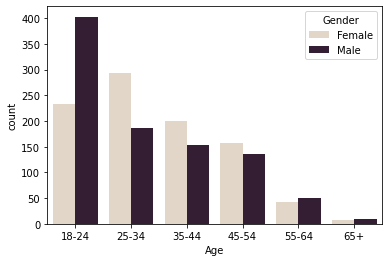

In [30]:
sns.countplot(x='Age', hue='Gender', palette='ch:.25', data=demo_data.sort_values(by=['Age']))

- There are clearly a lot **more men in the 18-24 age goupe**.
- **More women in the 25-34 age group**.
- As the age increases, the gender proportion gradually becomes even.

###  Country-Gender

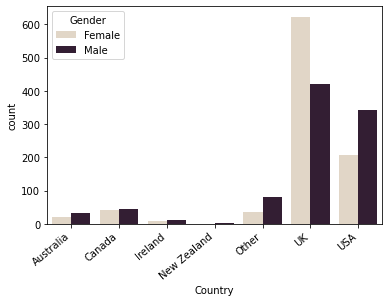

In [31]:
country_gender_plot = sns.countplot(x='Country', hue='Gender', palette='ch:.25', data=demo_data.sort_values(by=['Country']))
_ = country_gender_plot.set_xticklabels(country_gender_plot.get_xticklabels(), rotation=40, ha="right")

- **More women than men** were tested in the USA, New-Zealand (see next table) and "Other".
- **More men than women** in the UK.
- Around the same in the remaining countries.

### Age – Gender – Country cross table¶

In [32]:
pd.crosstab(demo_data['Age'], [demo_data['Gender'], demo_data['Country']])

Gender     Female                                                Male         \
Country Australia Canada Ireland New Zealand Other   UK USA Australia Canada   
Age                                                                            
18-24           1      7       3           0    12  112  99        20     25   
25-34          10      9       2           1    13  200  58         5      8   
35-44           4      8       3           0     7  150  29         3      7   
45-54           5      7       1           0     4  127  14         3      4   
55-64           0      7       0           0     0   29   7         1      1   
65+             0      3       0           0     0    5   0         0      1   

Gender                                       
Country Ireland New Zealand Other   UK  USA  
Age                                          
18-24         5           2    39   91  221  
25-34         3           2    26   80   63  
35-44         0           0    10  108   26  
45-54         3           0     5   99   22  
55-64         0           0     2   36   10  
65+           0           0     0    7    2

- **New-Zealand** doesn't have anyone over 34 years old and tested only one woman.
- **Ireland** doesn't have anyone over 54 and has no man in the 35-44 age group.
- **Australia** doesn't have anyone over 65 (and only one over 54) and tested 20 times more males in the 18-24 age group.
- **Canada** tested 3 times as many men in the 18-24 group and has only 2 males above 54.
- **UK** has over twice more women than men tested in the 25-34 group.
- **USA** has over twice more men tested in the 18-24 group and no woman over 64.
- **Other** countries tested men over 3 times more for the 18-24 age group, twice for the 25-34 group, doesn't have any woman in the 55-64 group and doesn't have anyone over 64.

In [33]:
def catplot_cross_table(data, x, hue, col):
    plot = sns.catplot(x=x, hue=hue, col=col, palette='ch:.25', data=data.sort_values(by=[x]), kind="count")

    for axes in plot.axes.flat:
        _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=40, ha="right")

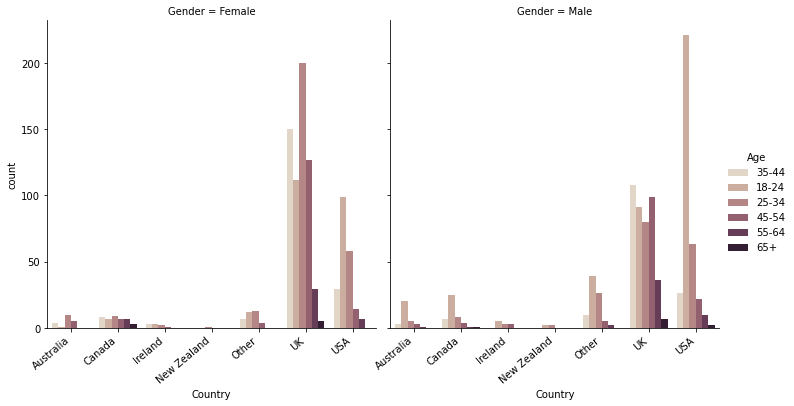

In [34]:
catplot_cross_table(demo_data, 'Country', 'Age', 'Gender')

Using the above plot, some aspects described above pop up quite nicely

### Education – Gender – Ethnicity cross table

In [35]:
demo_data.pivot_table(index='Education', columns=['Gender', 'Ethnicity'], aggfunc='size', fill_value=0)

Gender                                             Female        \
Ethnicity                                           Asian Black   
Education                                                         
Doctorate degree                                        1     0   
Left school at 16 years                                 0     0   
Left school at 17 years                                 0     0   
Left school at 18 years                                 0     0   
Left school before 16 years                             0     0   
Masters degree                                          4     6   
Professional certificate/ diploma                       0     3   
Some college or university, no certificate or d...      3     2   
University degree                                       7     6   

Gender                                                                \
Ethnicity                                          Mixed-Black/Asian   
Education                                                              
Doctorate degree                                                   0   
Left school at 16 years                                            0   
Left school at 17 years                                            0   
Left school at 18 years                                            0   
Left school before 16 years                                        0   
Masters degree                                                     0   
Professional certificate/ diploma                                  0   
Some college or university, no certificate or d...                 1   
University degree                                                  1   

Gender                                                                \
Ethnicity                                          Mixed-White/Asian   
Education                                                              
Doctorate degree                                                   1   
Left school at 16 years                                            0   
Left school at 17 years                                            0   
Left school at 18 years                                            0   
Left school before 16 years                                        0   
Masters degree                                                     3   
Professional certificate/ diploma                                  1   
Some college or university, no certificate or d...                 2   
University degree                                                  4   

Gender                                                                      \
Ethnicity                                          Mixed-White/Black Other   
Education                                                                    
Doctorate degree                                                   2     1   
Left school at 16 years                                            0     2   
Left school at 17 years                                            1     0   
Left school at 18 years                                            0     2   
Left school before 16 years                                        0     0   
Masters degree                                                     5     5   
Professional certificate/ diploma                                  0     2   
Some college or university, no certificate or d...                 1     8   
University degree                                                  2     8   

Gender                                                    Male        \
Ethnicity                                          White Asian Black   
Education                                                              
Doctorate degree                                      52     1     0   
Left school at 16 years                               40     0     0   
Left school at 17 years                               12     0     0   
Left school at 18 years                               35     0     1   
Left school before 16 ye

- Basically **few entries of people leaving school at or before 18**.

- **None white**, no one left school before being 16 and appart for the 'Other' category, there is only one female that didn't have higher education. No male expect in 'Other' have a Doctorate degree.
- **Asian** has only only one person having lower education (one male left school at 18) and no male in some college or university (but has some with masters degree, so not very logical)
- **Black** has only one person having lower education (one male left school at 18) and has no female with a professional diploma when it is the field with most respondents on the male side.
- **Mixed-Black/Asian** have very few respondents and only people following some college or university or with a university degree are represented.
- **Mixed-White/Asian**, all the female respondents have high education and 2 males left school at 18 or before. Males, unlike female have no master's degree respondent.
- **Mixed-White/Black**, all female except 2 has a finished university, master's or doctorate degree, while male have only 1 master's degree and the other have either unfinished university degrees, a professional diploma or left school at 18 or before.
- **Other**, lots of male have professional diplomas while no female have one and they have a high number of doctorate degree but also a high number of respondents that left school at 18 or before (both relative to the categories up until now).
- **White**, basically all the respondents are white as we saw before. Both genders have respondents in all categories but not in the same proportions. To see things clearer, you can refer to the below table (we will focus on proportion instead of counts). The majority of male are pursuing a college or university degree while the majority of female have an university degree. Nearly twice as many female have a doctorate degree and more male have left school at 18 or before.

In [36]:
pd.concat([value_counts_percentage(demo_data[(demo_data['Ethnicity'] == 'White') & (demo_data['Gender'] == 'Male')], 'Education'),
           value_counts_percentage(demo_data[(demo_data['Ethnicity'] == 'White') & (demo_data['Gender'] == 'Female')], 'Education')],
           axis = 1, keys=['Male', 'Female'])

Male        Female       
                                                      N      %      N      %
Some college or university, no certificate or d...  309  35.85    153  17.94
University degree                                   171  19.84    263  30.83
Professional certificate/ diploma                   120  13.92    130  15.24
Masters degree                                       93  10.79    156  18.29
Left school at 18 years                              56   6.50     35   4.10
Left school at 16 years                              54   6.26     40   4.69
Doctorate degree                                     29   3.36     52   6.10
Left school before 16 years                          16   1.86     12   1.41
Left school at 17 years                              14   1.62     12   1.41

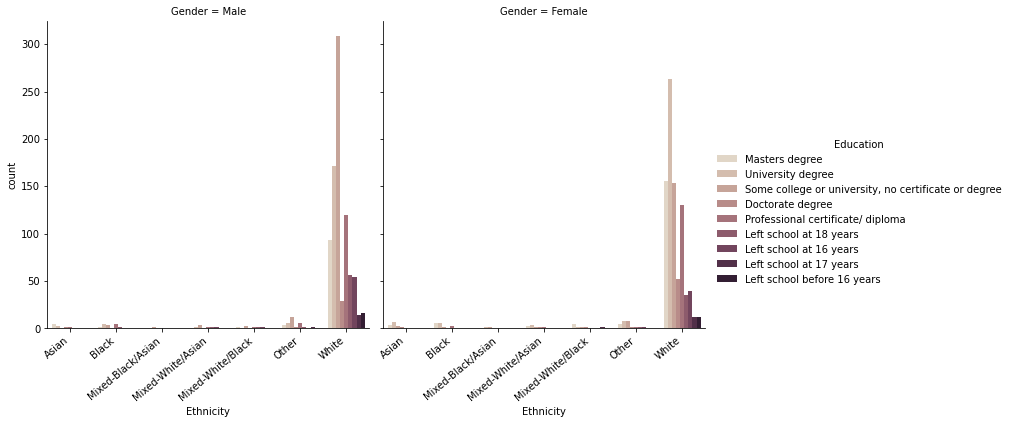

In [37]:
catplot_cross_table(demo_data, 'Ethnicity', 'Education', 'Gender')

It is hard to see anything using a plot except for white people due to the data unbalance.

> Warning: Rotating the data won't change anything since we will only get long sticks for white respondents, hiding the other ethnicities.

### Country – Gender – Ethnicity cross table

In [38]:
pd.crosstab(demo_data['Country'], [demo_data['Gender'], demo_data['Ethnicity']])

Gender      Female                                            \
Ethnicity    Asian Black Mixed-Black/Asian Mixed-White/Asian   
Country                                                        
Australia        0     0                 0                 0   
Canada           0     0                 0                 2   
Ireland          0     0                 0                 0   
New Zealand      0     0                 0                 0   
Other            1     1                 0                 0   
UK              11    14                 0                 6   
USA              3     2                 2                 3   

Gender                                     Male                          \
Ethnicity   Mixed-White/Black Other White Asian Black Mixed-Black/Asian   
Country                                                                   
Australia                   0     0    20     0     0                 0   
Canada                      0     1    38     0     0                 0   
Ireland                     0     0     9     0     0                 0   
New Zealand                 0     0     1     0     0                 0   
Other                       2     2    30     1     0                 1   
UK                          9    12   571     9    11                 0   
USA                         0    13   184     0     5                 0   

Gender                                                       
Ethnicity   Mixed-White/Asian Mixed-White/Black Other White  
Country                                                      
Australia                   0                 0     0    32  
Canada                      0                 2     2    42  
Ireland                     0                 0     0    11  
New Zealand                 0                 0     0     4  
Other                       0                 1     5    74  
UK                          2                 1     4   394  
USA                         7                 4    23   305

- Nearly no entry of **Mixed-Black/Asian**. (And compared to white, no entry of any other category)

- **USA** has no mixed-White/Black female, no asian and mixed-Black/Asian male.
- All the other countries have no mixed-black asian (except one male in an 'Other' country) (even UK that has such a large number of respondents)
- **UK** has 9 times more Mixed-White/Black female than male and 3 times more 'Other' female than male.

> Note: The other have so few respondents that it is hard to say that things result from an unbalance in proportion. But they all have mostly white respondents.

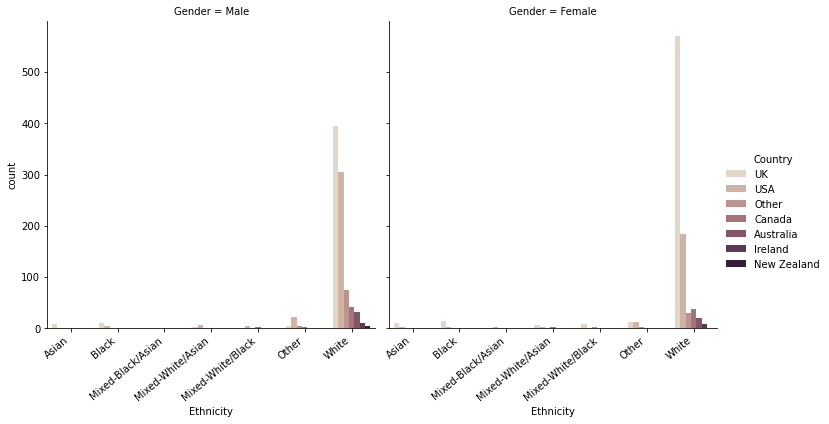

In [39]:
catplot_cross_table(demo_data, 'Ethnicity', 'Country', 'Gender')

Again, it is hard to see anything

### Correlations (using Cramér's V)

"*In statistics, Cramér's V (sometimes referred to as Cramér's phi and denoted as φc) is a measure of association between two nominal variables, giving a value between 0 and +1 (inclusive). It is based on Pearson's chi-squared statistic and was published by Harald Cramér in 1946.*"([Wikipedia](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V))

Below we define a set of useful function for working with correlations.

In [40]:
def get_pval_code(pval):
    '''
    Returns a significance code string for a given p-value.
    '''
    code = ''
    if pval < 0.001:
        code = '***'
    elif pval < 0.01:
        code = '**'
    elif pval < 0.05:
        code = '*'
    elif pval < 0.1:
        code = '.'
    return code

def display_pval_codes():
    print("Significance codes: 0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1")

In [41]:
def cramers_v(crosstab):
    ''' Returns Cramer's V correlation coefficient (and statistic significance) for data 
        delivered as a crosstable. Used for nominal data.
    '''
    
    chi2 = chi2_contingency(crosstab)[0]
    n = crosstab.sum().sum()
    phi2 = chi2/n
    r,k = crosstab.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    
    return round(np.sqrt(phi2corr / min((kcorr-1), (rcorr-1))), 3), chi2_contingency(crosstab)[1]

In [42]:
def nominal_corrs(dataset, col_1_names, col_2_names, pvalues=True):
    ''' Returns Cramer's V coefficients matrix and p-value (obtained with Chi-square test of independence) matrix for the whole dataset.
    
    col_1_names, col_2_names - lists of names of columns to correlate. Function creates crosstables for every 
        columns' combination and returns a matrix with single Cramer's V coefficients of every combination;
    pvalues - if set to False, only correlation values will be returned in DataFrame 
        (without '**' marks for significant observations)
    '''
    
    corr_table = pd.DataFrame()
    pval_table = pd.DataFrame()
    for i in range(len(col_1_names)):
        for j in range(len(col_2_names)):
            crosstab = pd.crosstab(dataset[col_1_names[i]], [dataset[col_2_names[j]]])
            corr, pval = cramers_v(crosstab)
            
            v = ' '.join([str(i) for i in (corr, get_pval_code(pval))]) if pvalues else corr
            
            corr_table.loc[i, j] = v
            pval_table.loc[i,j] = pval
    corr_table.index = col_1_names
    corr_table.columns = col_2_names
    pval_table.index = col_1_names
    pval_table.columns = col_2_names
    
    return corr_table, pval_table

In [43]:
def heatmap_corr(dataset, method='spearman', ready=False, mask=True, nominal=False):
    ''' Extended sns.heatmap() method. 
    
    dataset - can be 'pure' data (without calculated correlations) or a DataFrame with already calcuateg 
        correlations (in that case attribute 'ready' should be set to True);
    method - mainly pearson or spearman; nominal correlations should be calculated externally 
        and be delivered with attribute ready=True; 
    mask - if dataset is NOT a cross-valued DataFrame of one type, mask should be set to False;
    nominal - for nominal data correlations values are in range (0, 1) instead of (-1, -1). 
        nominal=True should be folowed by ready=True 
    '''
    
    if not ready:
        corr = dataset.corr(method=method)
    elif ready:
        corr = dataset
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    vmax = corr.max().max()
    if nominal:
        center = 0.5
        cmap=None
    elif not nominal:
        center = 0
    if mask:
        mask = np.zeros_like(corr, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True
        np.fill_diagonal(corr.values, -2)
        vmax = corr.max().max()
    elif not mask:
        mask=None
    f, ax = plt.subplots(figsize=(20,9))
    return sns.heatmap(corr, cmap=cmap, mask=mask, vmax=vmax, center=center, annot=True, square=True, 
                       linewidths=0.5, cbar_kws={'shrink': 0.5})

Let's display the correlations among the demographic data.

In [44]:
corr_table_demo, pval_table_demo = nominal_corrs(demo_data, demographic_columns, demographic_columns)
display_pval_codes()
corr_table_demo

Significance codes: 0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Age     Gender  Education    Country Ethnicity
Age          1.0 ***  0.196 ***  0.229 ***  0.173 ***    0.014 
Gender     0.196 ***  0.999 ***  0.235 ***  0.219 ***      0.0 
Education  0.229 ***  0.235 ***    1.0 ***    0.2 ***      0.0 
Country    0.173 ***  0.219 ***    0.2 ***    1.0 ***  0.053 **
Ethnicity     0.014        0.0        0.0    0.053 **   1.0 ***

Values with at least one * next to them are statistically significant (p-value < 0.05).

<AxesSubplot:>

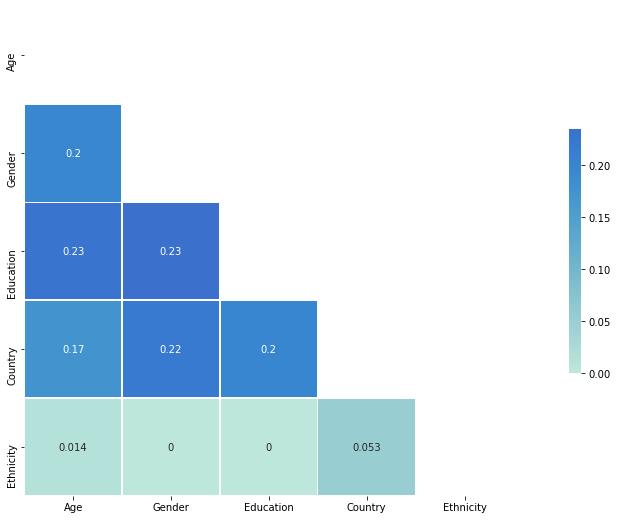

In [45]:
heatmap_corr(nominal_corrs(demo_data, demographic_columns, demographic_columns, pvalues=False)[0],
             nominal=True, ready=True)

The demographic variables are not correlated with each other (most of the values are statically significant).

> Important: A statistically significant correlation does not necessarily mean that the strength of the correlation is strong.  A low p-value reassures us that the correlation is this way nearly all of the time.

#### This section tries to interpret these very weak relationships between variables

**Ethnicity**'s relations small statistical significance can be explained by the great imbalance in the various possible classes (all whites basically). Meaning the lack of correlation could be caused by *chance*. The abscence (high significance) of correlation with country may sound surprising but since the only countries considered are the "same", as in developped and white prevalence in respondant, it makes sense. I think the low correlation with age and gender are correct for obvious reasons. I can't be so sure for education (as you can see below, there is around 50% chances the correlation was obtained by chance).

In [46]:
pval_table_demo.loc['Education', 'Ethnicity']

0.5424195567242813

There is a statistically significant very weak correlation between **country and gender**. We know, at least for the countries represented here (developped countries were population is basically 50/50), that there isn't a real correlation between the country and gender. The very weak correlation may be due to some countries having more female repondents and some have more males (as we saw previously). 

The weak correlation between **age and gender** can be explained, as we saw previously, that gender wasn't even for some young age groups but as we know this correlation doesn't generalize to real life.

A correlation between **age and country** would be relevant if some countries were more developped than the others but here we have only developped country. This idea would make more sense if we had more categories for elder people, meaning a country's life expectency could be taken into account, but here a single group for 65+ year olds isn't enough for developped countries. The very weak statistically significant relationship may be caused by the 'other' countries.

The very weak correlations we can keep in mind are the following:
- **Age / Education** (makes sense since basically no 18-24 would have a doctorate degree for example)
- **Gender / Education** (males and females may have slightly different aims and standards regarding education)
- **Education / Country** (for social tendencies, country development and other reasons, the education and country may be correlated but since the country here are very similar, the relationship is weak)

## Personality features analysis

All the personnality traits have a score that is represented by a real value in the dataset.

Some have their original possible scores in ranges of integer types (with a step of 1, so 4-7 means 4, 5, 6 and 7):
- Neuroticism: 12-60
- Extraversion: 16-59
- Openness to experience: 24-60
- Agreeableness: 12-60
- Conscientiousness: 17-59

In [47]:
pers_data = dataset[personality_columns]
pers_data.describe()

Neuroticism  Extraversion  Openness to experience  Agreeableness  \
count  1877.000000   1877.000000             1877.000000    1877.000000   
mean     -0.000551     -0.001951               -0.003224      -0.000657   
std       0.998442      0.997418                0.995691       0.996689   
min      -3.464360     -3.273930               -3.273930      -3.464360   
25%      -0.678250     -0.695090               -0.717270      -0.606330   
50%       0.042570      0.003320               -0.019280      -0.017290   
75%       0.629670      0.637790                0.723300       0.760960   
max       3.273930      3.273930                2.901610       3.464360   

       Conscientiousness  Impulsiveness  Sensation seeking  
count        1877.000000    1877.000000        1877.000000  
mean           -0.000394       0.005293          -0.007408  
std             0.997657       0.954148           0.962074  
min            -3.464360      -2.555240          -2.078480  
25%            -0.652530      -0.711260          -0.525930  
50%            -0.006650      -0.217120           0.079870  
75%             0.584890       0.529750           0.765400  
max             3.464360       2.901610           1.921730

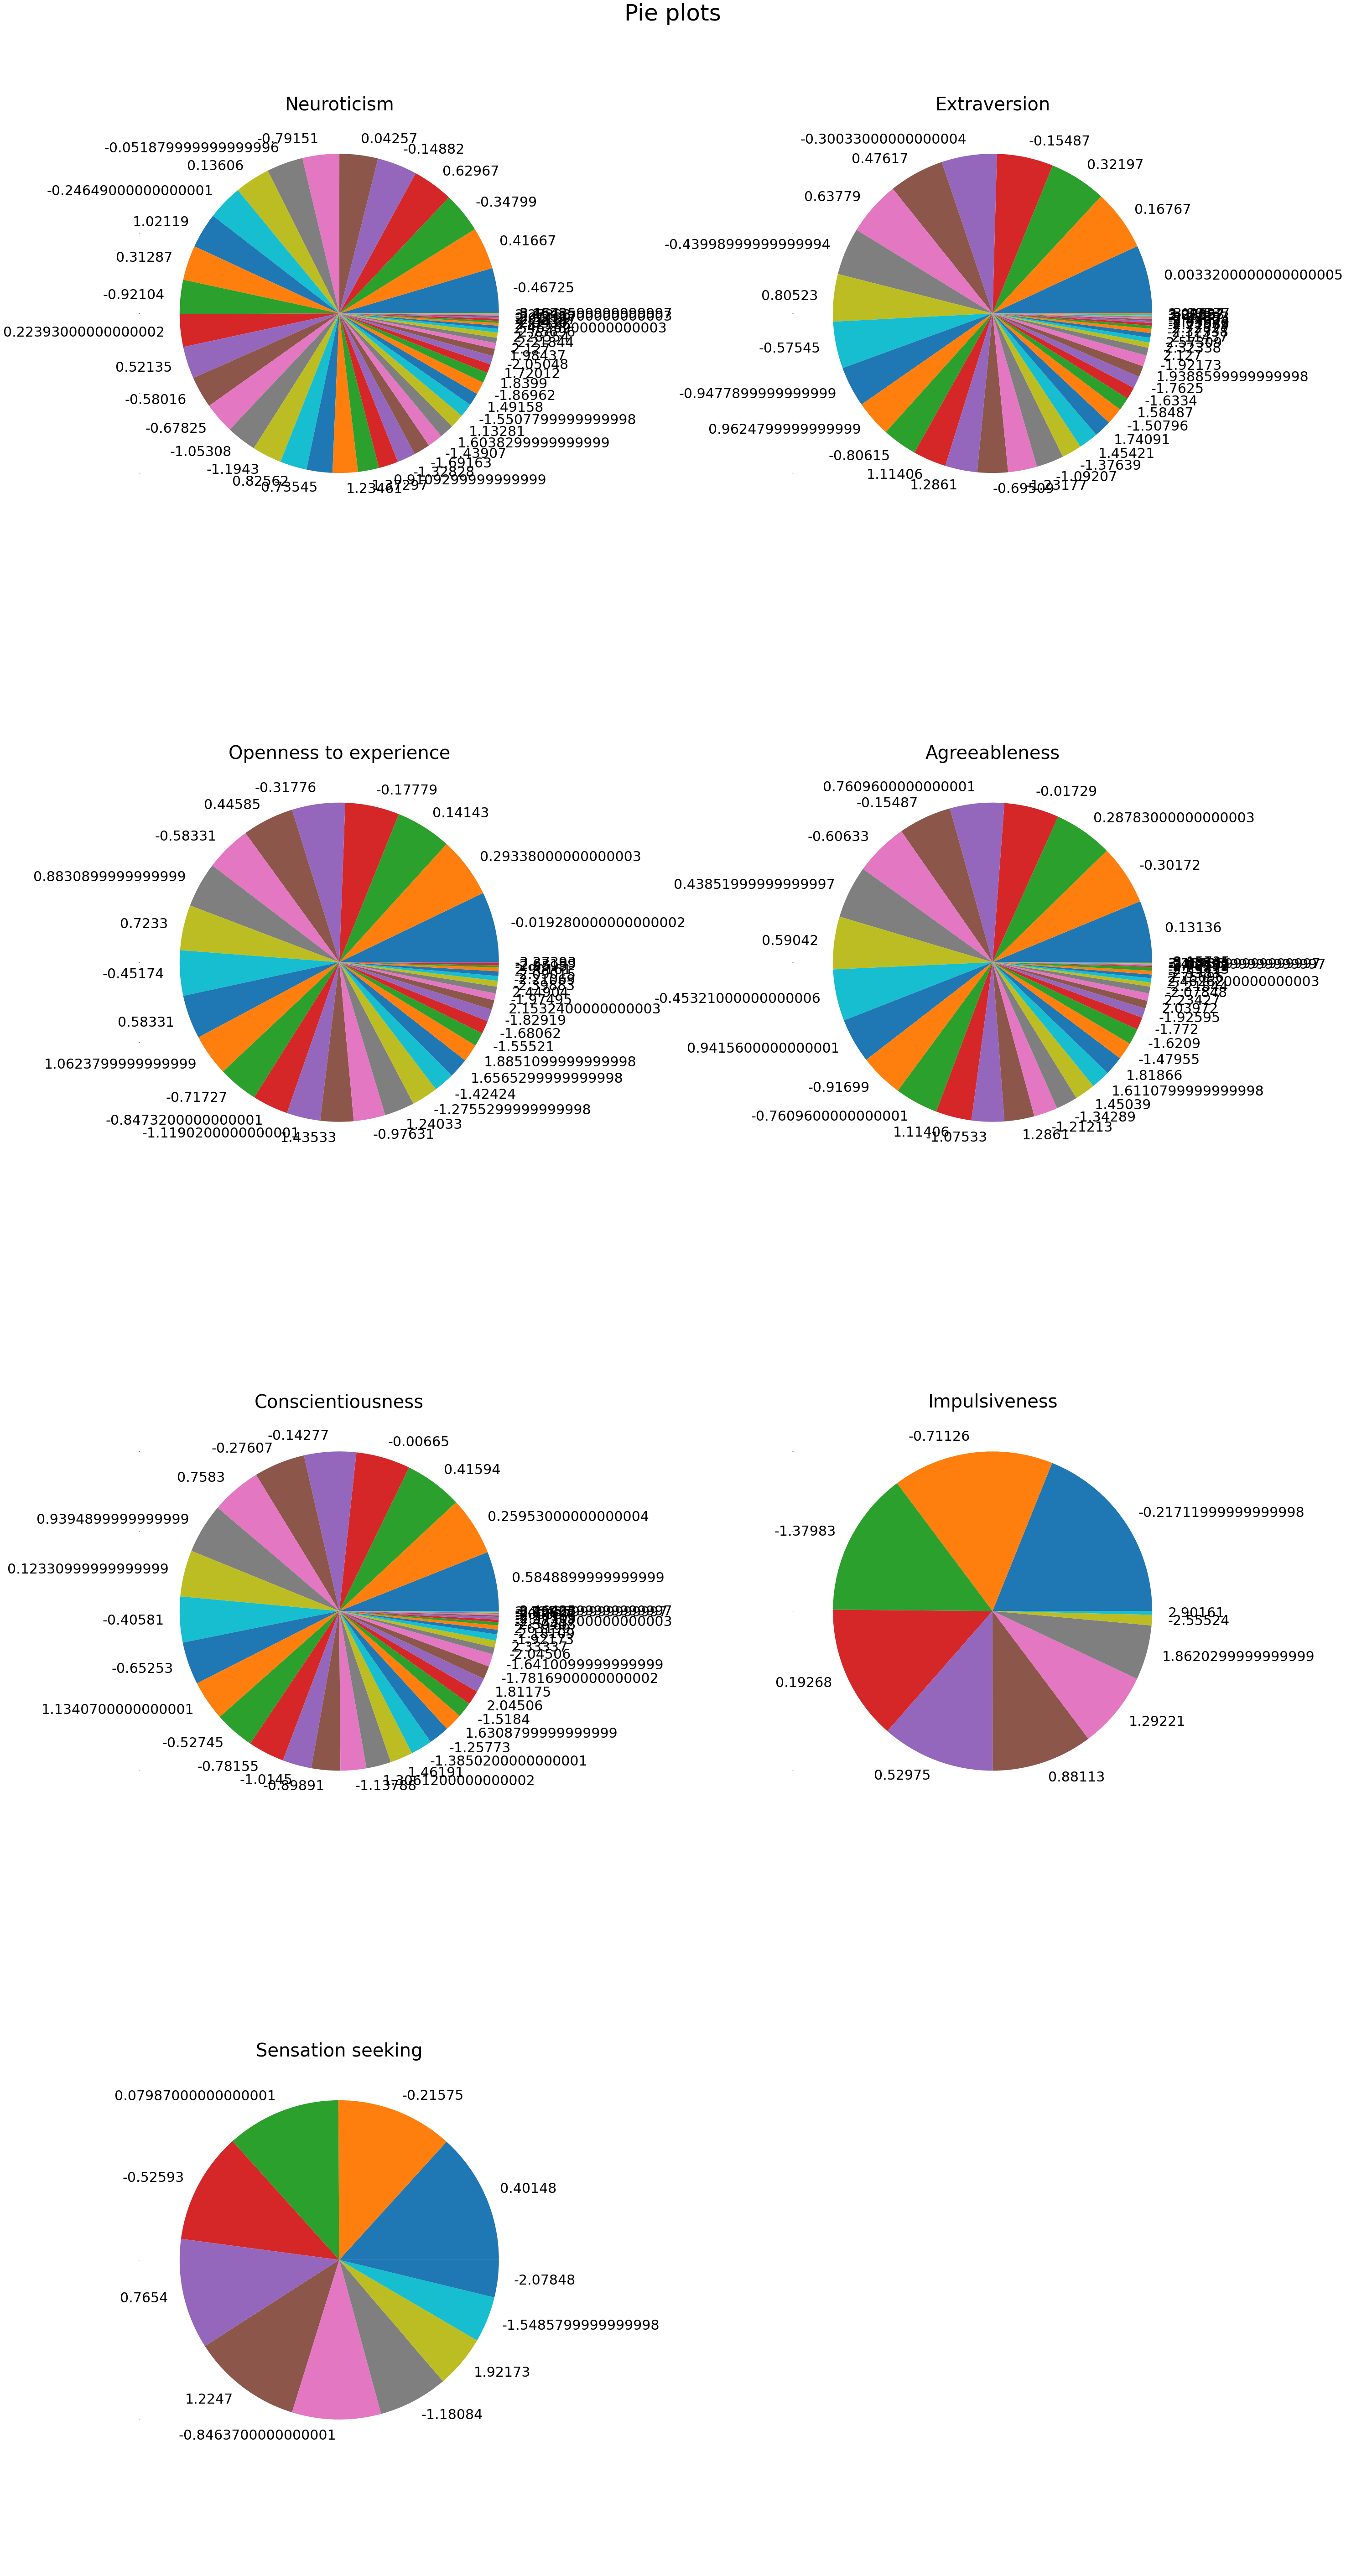

In [48]:
plot_pies(pers_data, personality_columns)

The values overlap but we don't really care about them, we just want to see if *some slices are bigger than the others*.

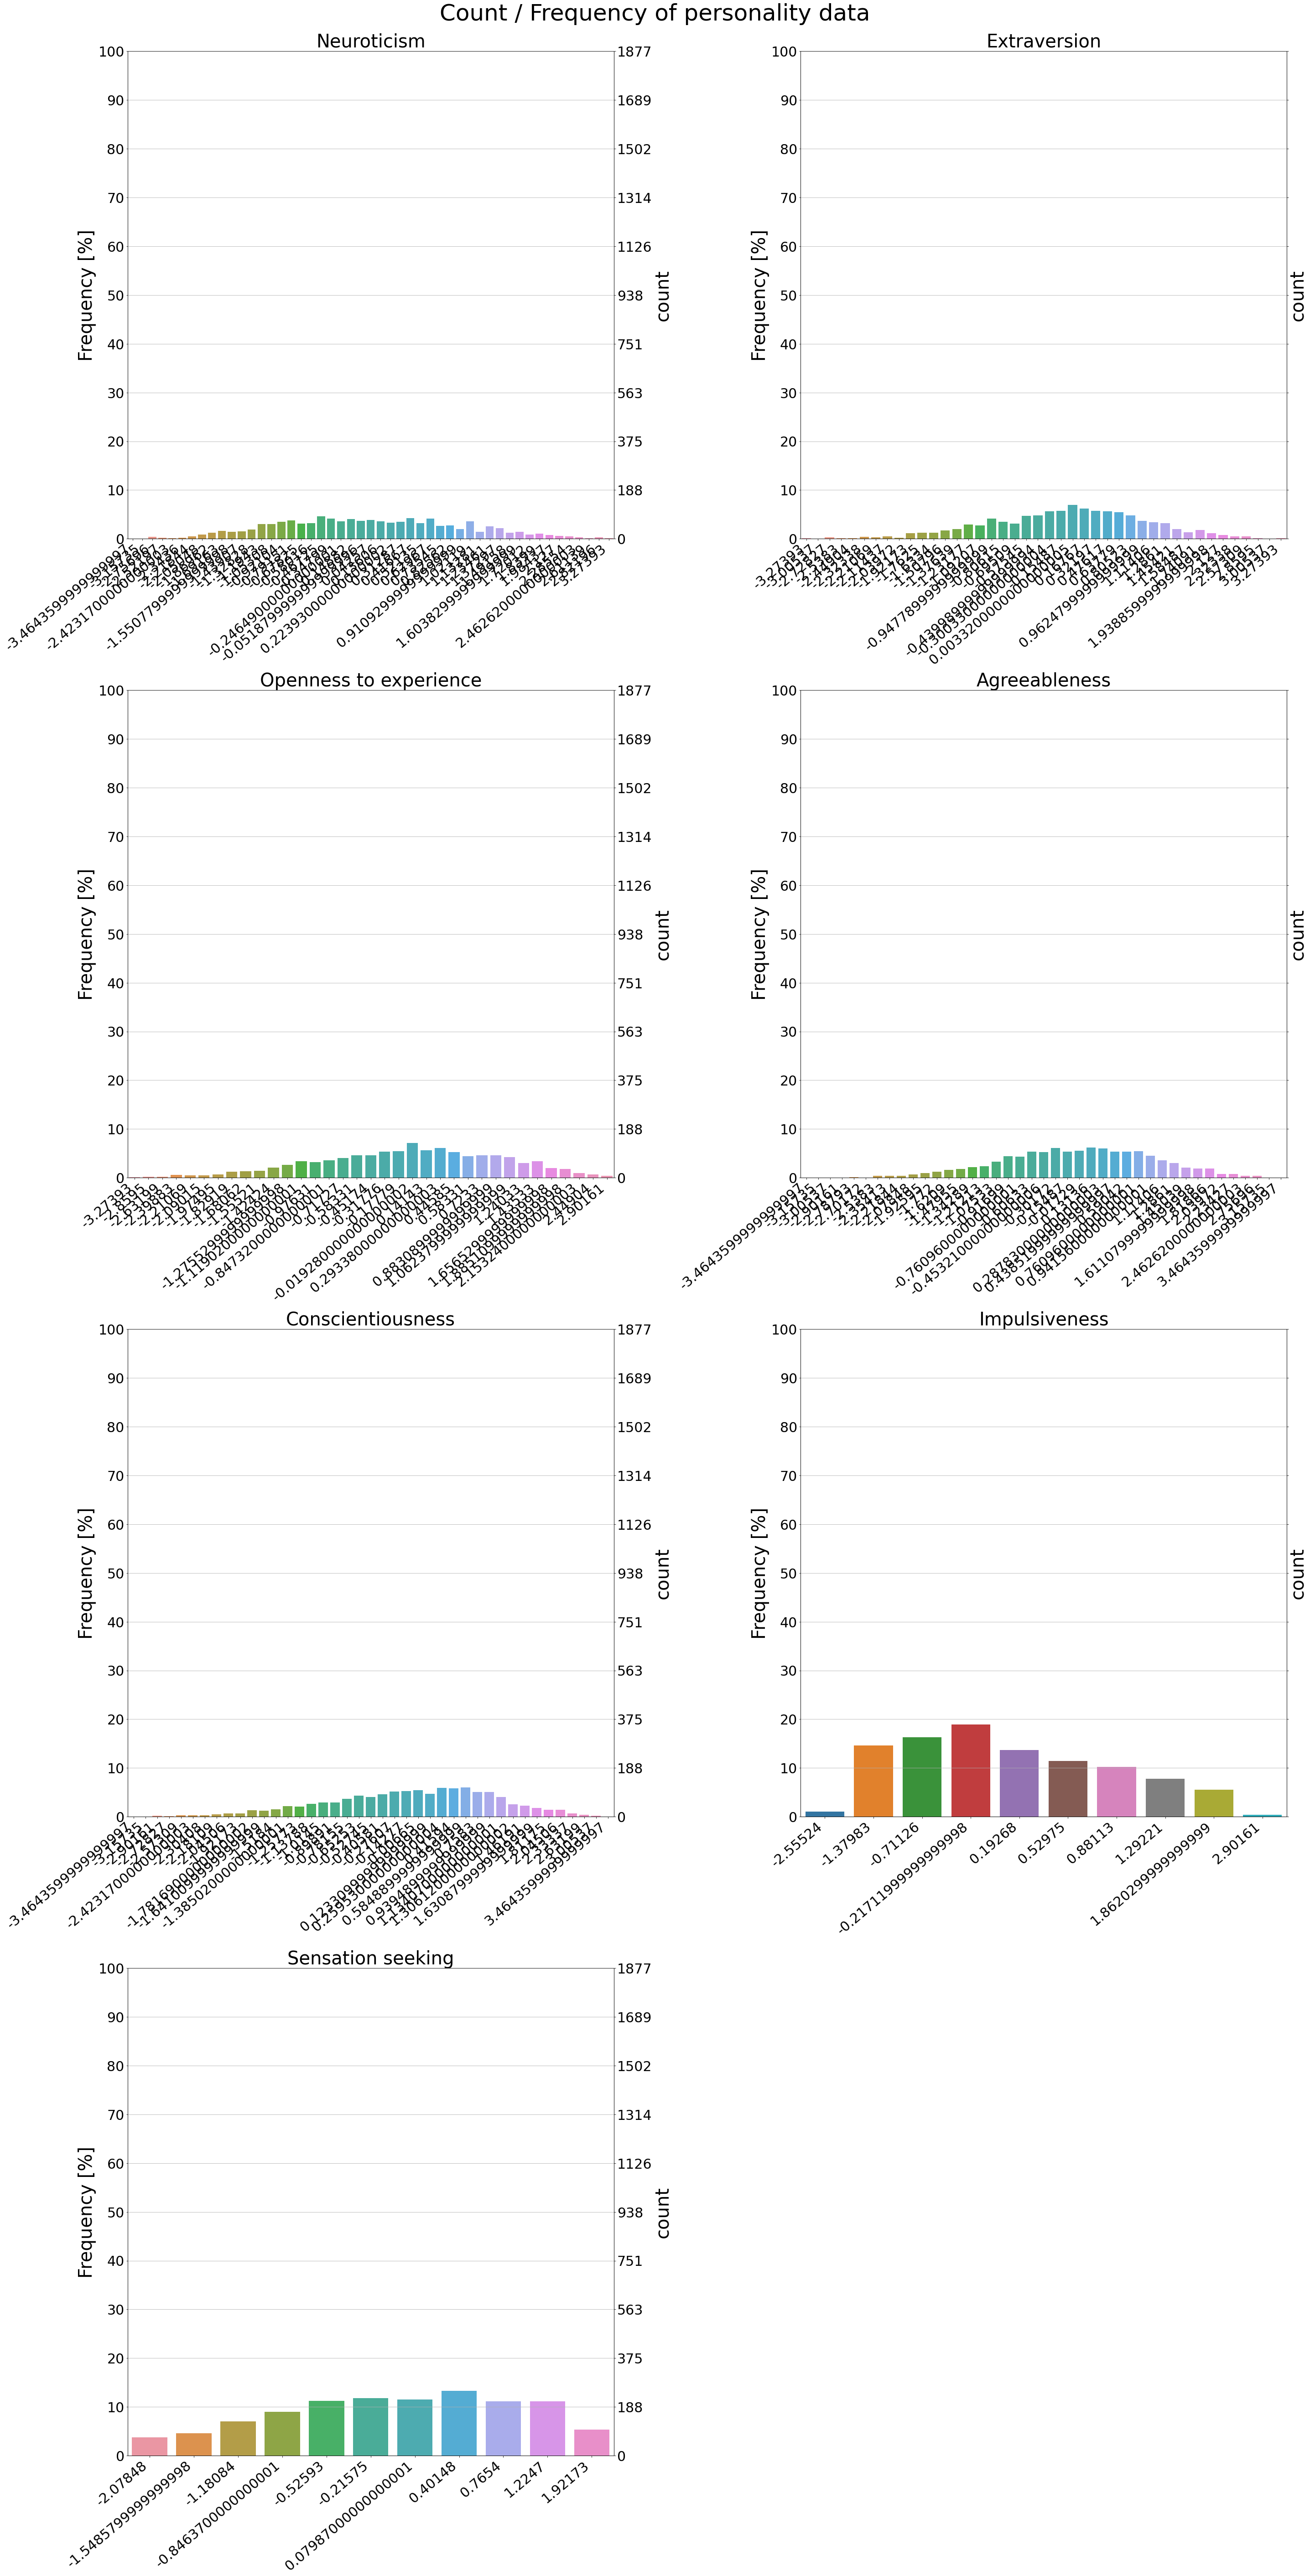

In [49]:
plot_counts(pers_data, personality_columns, show_percent=False, fig_title="Count / Frequency of personality data")

Hard to interpret since there are many levels for some personality traits and they are coded as hardly interpretable real values, even though they are sorted in the same order as the original values, which aren't really interpretable either.

According to the pie plot, there **doesn't seem to be any huge unbalance**.

The count / frequency plot is more interesting. The distributions of all the personality traits may be gaussian distribution, with some skewness involved sometimes. Let's plot those densities a bit more nicely against actual estimated gaussian distribution to see if our intuition was right!

In [50]:
def plot_densities(dataset, columns, fig_title="Density plots", plot_gaussian = True, color="Blue"):
    ncount = len(dataset)
    
    ncols, nrows = 2, math.ceil(len(columns) / 2)
    plt.rc('xtick', labelsize=30)
    plt.rc('axes', labelsize=40)
    plt.rc('legend', fontsize=30)
    
    fig, axes = plt.subplots(figsize=(20*ncols, 20*nrows), nrows=nrows, ncols=ncols, sharey=True)
    fig.suptitle(fig_title + "\n\n", fontsize=50)
    
    if plot_gaussian:
        stds = dataset[columns].std()
        means = dataset[columns].mean()
    
    for index, col in enumerate(columns):
        i, j = index // ncols, index % ncols
        
        ax = sns.histplot(dataset[col], ax=axes[i,j], color=color, kde=True, stat="probability", kde_kws={"bw_adjust":3})
        
        if plot_gaussian:
            xmin, xmax = ax.get_xlim()
            xnorm = np.arange(xmin, xmax, 0.001)
            ynorm = norm.pdf(xnorm, means[col], stds[col])
            ax.plot(xnorm, ynorm, 'r', lw=2)
            ax.legend(["Normal distribution based on empirical mean and std", "Estimated distribution"], loc="upper right")
    
        ax.set_title(col, fontdict={'fontsize':40})

    for empty in range(len(columns), ncols * nrows):
        i, j = empty // ncols, empty % ncols
        axes[i,j].axis("off")

    plt.tight_layout()
    sns.reset_orig()

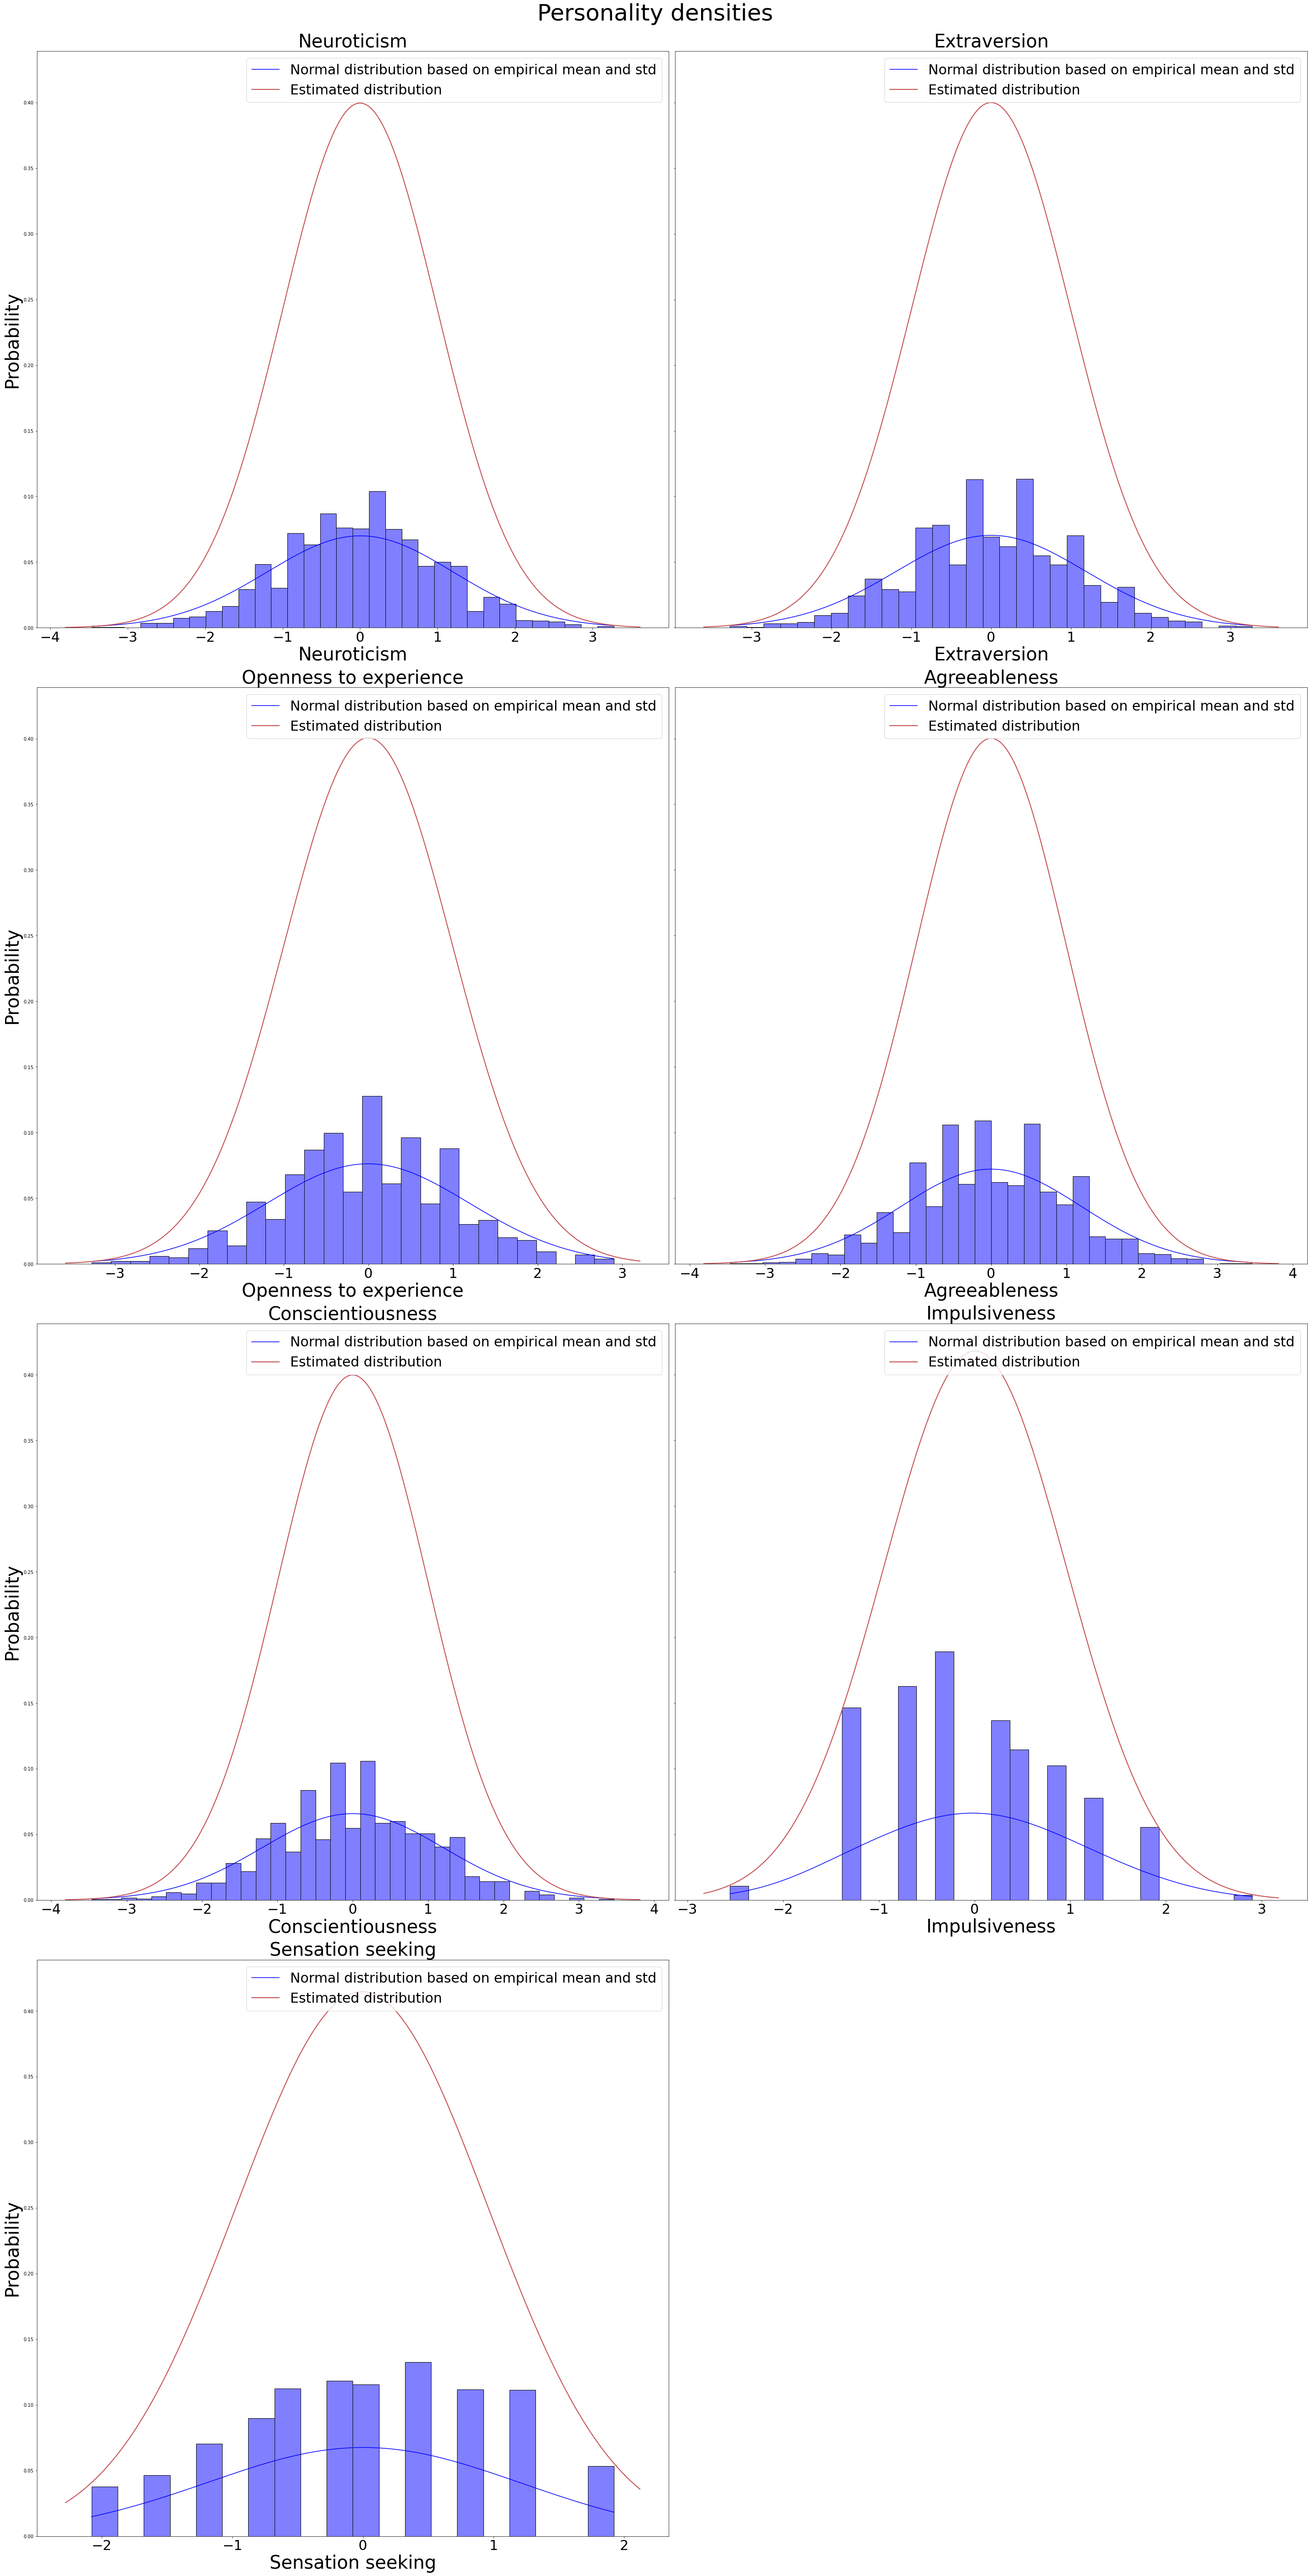

In [51]:
plot_densities(pers_data, personality_columns, "Personality densities")

They are indeed **belshaped but far from the shape of a fitted gaussian distribution**.

Let's try a statistical.

In [52]:
def normal_test(dataset, columns = None, alpha = 0.05):
    if columns is None:
        columns = dataset.columns
    res = pd.DataFrame()
    data = dataset[columns]
    stats, pvals = data.apply(shapiro).values
    return pd.DataFrame(data=[("Not rejected" if pval > alpha else "Rejected") + f" with alpha = {alpha}"  for pval in pvals], columns=["H0: is from normal distribution"], index=columns)

In [53]:
normal_test(pers_data)

H0: is from normal distribution
Neuroticism             Not rejected with alpha = 0.05
Extraversion                Rejected with alpha = 0.05
Openness to experience      Rejected with alpha = 0.05
Agreeableness               Rejected with alpha = 0.05
Conscientiousness           Rejected with alpha = 0.05
Impulsiveness               Rejected with alpha = 0.05
Sensation seeking           Rejected with alpha = 0.05

After running the [Shapiro-Wilk test](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test) on each personality trait, **the only hypothesis that couldn't be rejected was "Neuroticism is from a normal distribution"**.

## Correlations among personality traits (using Spearman)

"*In statistics, Spearman's rank correlation coefficient or Spearman's ρ, named after Charles Spearman, is a nonparametric measure of rank correlation (statistical dependence between the rankings of two variables).
...
 Spearman's correlation assesses monotonic relationships (whether linear or not). If there are no repeated data values, a perfect Spearman correlation of +1 or −1 occurs when each of the variables is a perfect monotone function of the other.*"([Wikipedia](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient))

Again, we have to define a few useful functions.

In [54]:
def calculate_r(df1, df2, method='spearman', pvalues=True):
    ''' Returns correlation matrix extended by statistical significance index. Used for non-nominal data.
    
    df1, df2 - DataFrames of data to correlate;
    method - mainly pearson and spearman;
    pvalues - if set to False, only correlation values will be returned in DataFrame 
        (without '**' marks for significant observations)
    '''
    float_precision = 3
    
    data_corr_table = pd.DataFrame()
    data_pvalues = pd.DataFrame()
    for x in df1.columns:
        for y in df2.columns:
            if method == 'pearson':
                corr = pearsonr(df1[x], df2[y])
            elif method == 'spearman':
                corr = spearmanr(df1[x], df2[y])
            else:
                raise ValueError('Unknown method')
            if pvalues:
                data_corr_table.loc[x,y] = '{} {}'.format(round(corr[0], float_precision), get_pval_code(corr[1]))
            elif not pvalues:
                data_corr_table.loc[x,y] = round(corr[0], float_precision)
            data_pvalues.loc[x,y] = corr[1]
    
    return data_corr_table, data_pvalues

In [55]:
def get_ranked_corr(correlations, pvalues, pval_threshold=0.05, corr_threshold=0.5, name_transform=lambda x: x, against_itself=True, comp_corr = operator.ge, comp_pval = operator.le):
    ''' Returns the sorted top (wanted) correlations as a Dataframe
    
    correlations - the correlations dataframe.
    pvalues - The pvalues of H0: the correlation is unsignificant.
    pval_threshold - alpha to compare to pvalue
    corr_threshold - Threadshold of correlations to consider (upper or lower depending on comp_corr)
    name_transform - transform the column names before writing index.
    against_itself - True if columns and rows are the same data (if symmetric matrix)
    comp_corr - comparator to compare to the corr_threshold (default operator.ge means we want correlations >=)
    comp_pval - comparator to compare the pvalue (default operator.le meaning we want pvalues <=)
    '''
    
    columns = correlations.columns
    rows = correlations.index
    pairs=[]
    for i, row in enumerate(rows):
        for j, col in enumerate(columns[i+1:], start=i+1) if against_itself else enumerate(columns):
            corr = correlations.iloc[i, j]
            if comp_pval(pvalues.iloc[i,j], pval_threshold) and comp_corr(abs(corr), corr_threshold):
                pairs.append((name_transform(row), name_transform(col), corr))
    list.sort(pairs, key=lambda x: abs(x[2]), reverse=True)
    return pd.Series(data=[x[2] for x in pairs], index=[' / '.join((x[0], x[1])) for x in pairs], name="Correlation", dtype=np.float64).to_frame()

In [56]:
pers_data_corr_table, pers_data_pvalues = calculate_r(pers_data, pers_data, method='spearman')
pers_data_corr_table

Neuroticism Extraversion Openness to experience  \
Neuroticism                1.0 ***   -0.417 ***                 0.015    
Extraversion            -0.417 ***      1.0 ***              0.226 ***   
Openness to experience      0.015     0.226 ***                1.0 ***   
Agreeableness           -0.206 ***    0.162 ***                 0.037    
Conscientiousness       -0.378 ***     0.29 ***              -0.073 **   
Impulsiveness            0.168 ***    0.119 ***               0.27 ***   
Sensation seeking         0.09 ***     0.19 ***              0.405 ***   

                       Agreeableness Conscientiousness Impulsiveness  \
Neuroticism               -0.206 ***        -0.378 ***     0.168 ***   
Extraversion               0.162 ***          0.29 ***     0.119 ***   
Openness to experience        0.037          -0.073 **      0.27 ***   
Agreeableness                1.0 ***         0.237 ***    -0.226 ***   
Conscientiousness          0.237 ***           1.0 ***    -0.344 ***   
Impulsiveness             -0.226 ***        -0.344 ***       1.0 ***   
Sensation seeking         -0.208 ***        -0.254 ***     0.628 ***   

                       Sensation seeking  
Neuroticism                     0.09 ***  
Extraversion                    0.19 ***  
Openness to experience         0.405 ***  
Agreeableness                 -0.208 ***  
Conscientiousness             -0.254 ***  
Impulsiveness                  0.628 ***  
Sensation seeking                1.0 ***

<AxesSubplot:>

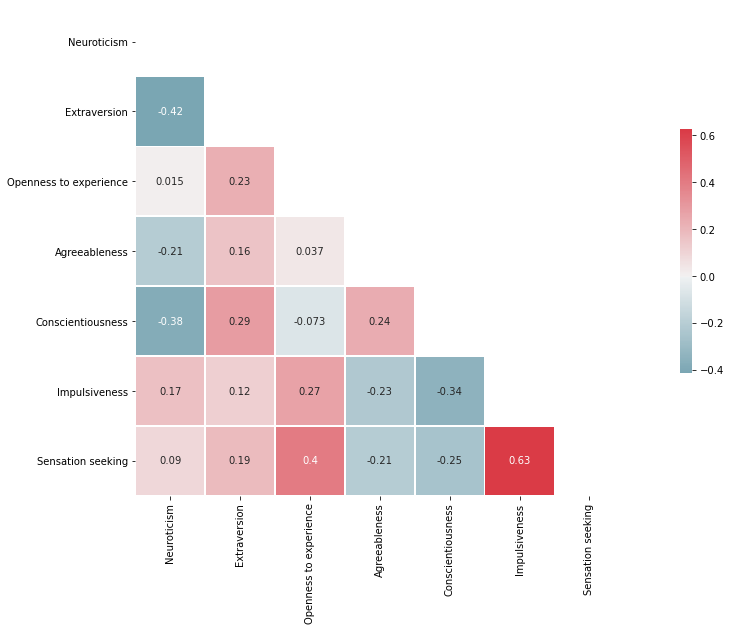

In [57]:
heatmap_corr(pers_data, method='spearman')

Again, **no strong correlations** but some **moderate and weak-moderate ones**.
The sign of the correlation is interesting here.

**Neuroticism** for example has **no positive correlation** with any other personality trait. And has a weak-moderate downhill correlation with extraversion and conscientiousness. 

> Tip: If you ever feel moody, anxious, frustrated, lonely, depresed or other such things, try to be more outgoing, talkative, energetic, careful and diligent and see how it goes.

But enough with the life advice.

I also found it interesting that **Extraversion has no weak or moderate correlation** with any other personality trait (and that its strongest correlation, which may be considered very weak, is with conscentiousness).

Below is a list of the very weak and above correlations. (|r| >= 0.15)

In [58]:
pers_data_corr_table_nopval, _ = calculate_r(pers_data, pers_data, method='spearman', pvalues=False)

In [59]:
get_ranked_corr(pers_data_corr_table_nopval, pers_data_pvalues, corr_threshold=0.15)

Correlation
Impulsiveness / Sensation seeking                 0.628
Neuroticism / Extraversion                       -0.417
Openness to experience / Sensation seeking        0.405
Neuroticism / Conscientiousness                  -0.378
Conscientiousness / Impulsiveness                -0.344
Extraversion / Conscientiousness                  0.290
Openness to experience / Impulsiveness            0.270
Conscientiousness / Sensation seeking            -0.254
Agreeableness / Conscientiousness                 0.237
Extraversion / Openness to experience             0.226
Agreeableness / Impulsiveness                    -0.226
Agreeableness / Sensation seeking                -0.208
Neuroticism / Agreeableness                      -0.206
Extraversion / Sensation seeking                  0.190
Neuroticism / Impulsiveness                       0.168
Extraversion / Agreeableness                      0.162

# Drug consumption analysis

Here are the different levels for each drug:

0 - Never Used

1 - Used over a Decade Ago

2 - Used in Last Decade

3 - Used in Last Year

4 - Used in Last Month

5 - Used in Last Week

6 - Used in Last Day

In [60]:
drug_data = dataset[drugs_columns]

In [61]:
drug_data.describe()

Alcohol consumption  Amphetamines consumption  \
count          1877.000000               1877.000000   
mean              4.637720                  1.337773   
std               1.328234                  1.782384   
min               0.000000                  0.000000   
25%               4.000000                  0.000000   
50%               5.000000                  0.000000   
75%               6.000000                  2.000000   
max               6.000000                  6.000000   

       Amyl nitrite consumption  Benzodiazepine consumption  \
count               1877.000000                 1877.000000   
mean                   0.606819                    1.461907   
std                    1.064005                    1.869193   
min                    0.000000                    0.000000   
25%                    0.000000                    0.000000   
50%                    0.000000                    0.000000   
75%                    1.000000                    3.000000   
max                    6.000000                    6.000000   

       Caffeine consumption  Cannabis consumption  Chocolate consumption  \
count           1877.000000           1877.000000            1877.000000   
mean               5.484283              2.980288               5.109750   
std                1.115119              2.286778               1.085716   
min                0.000000              0.000000               0.000000   
25%                5.000000              1.000000               5.000000   
50%                6.000000              3.000000               5.000000   
75%                6.000000              5.000000               6.000000   
max                6.000000              6.000000               6.000000   

       Cocaine consumption  Crack consumption  Ecstasy consumption  \
count          1877.000000        1877.000000          1877.000000   
mean              1.156633           0.295685             1.309536   
std               1.510791           0.835925             1.647373   
min               0.000000           0.000000             0.000000   
25%               0.000000           0.000000             0.000000   
50%               0.000000           0.000000             0.000000   
75%               2.000000           0.000000             3.000000   
max               6.000000           6.000000             6.000000   

       Heroin consumption  Ketamine consumption  Legal highs consumption  \
count         1877.000000           1877.000000              1877.000000   
mean             0.372403              0.564198                 1.353223   
std              1.034761              1.216341                 1.790881   
min              0.000000              0.000000                 0.000000   
25%              0.000000              0.000000                 0.000000   
50%              0.000000              0.000000                 0.000000   
75%              0.000000              0.000000                 3.000000   
max              6.000000              6.000000                 6.000000   

       Lysergic acid diethylamide consumption  Methadone consumption  \
count                             1877.000000            1877.000000   
mean                                 1.053277               0.826319   
std                                  1.484582               1.648379   
min                                  0.000000               0.000000   
25%                                  0.000000               0.000000   
50%                                  0.000000               0.000000   
75%                                  2.000000               0.000000   
max                                  6.000000               6.000000   

       Magic mushrooms consumption  Nicotine consumption  \
count                  1877.000000           1877.000000   
mean                      1.177944              3.194992   
std                       1.459212              2.415814   
min                       0.000000          

Let's make a table with the number of observation and frequency for every consumption level of every drug.

In [62]:
counts = []
proportions = []
for drug in drugs_columns:
    counts.append(drug_data[drug].value_counts())
    proportions.append(drug_data[drug].value_counts(normalize=True))

drug_table_count = pd.concat(counts, axis=1, 
          keys=drugs_columns, sort=True)
drug_table_prop = (pd.concat(proportions, axis=1, 
          keys=drugs_columns, sort=True) * 100).round(2)
drug_table = pd.concat([drug_table_count.T, drug_table_prop.T], keys=['N', '%'], axis=1)

drug_table

N                                 \
                                           0    1    2    3    4    5     6   
Alcohol consumption                       33   34   68  197  284  758   503   
Amphetamines consumption                 973  230  241  196   75   61   101   
Amyl nitrite consumption                1299  210  236   91   24   14     3   
Benzodiazepine consumption               999  116  230  234  119   84    95   
Caffeine consumption                      27   10   24   59  106  271  1380   
Cannabis consumption                     413  207  266  210  138  185   458   
Chocolate consumption                     32    2   10   53  295  680   805   
Cocaine consumption                     1036  160  267  257   98   40    19   
Crack consumption                       1622   67  109   59    9    9     2   
Ecstasy consumption                     1020  112  232  275  154   63    21   
Heroin consumption                      1600   68   91   65   24   16    13   
Ketamine consumption                    1488   43  140  129   40   33     4   
Legal highs consumption                 1092   29  195  321  109   64    67   
Lysergic acid diethylamide consumption  1069  257  175  213   96   55    12   
Methadone consumption                   1424   39   95  148   50   48    73   
Magic mushrooms consumption              982  208  259  272  114   39     3   
Nicotine consumption                     428  193  203  184  106  156   607   
Volatile substance abuse consumption    1452  199  133   59   13   14     7   

                                            %                              \
                                            0      1      2      3      4   
Alcohol consumption                      1.76   1.81   3.62  10.50  15.13   
Amphetamines consumption                51.84  12.25  12.84  10.44   4.00   
Amyl nitrite consumption                69.21  11.19  12.57   4.85   1.28   
Benzodiazepine consumption              53.22   6.18  12.25  12.47   6.34   
Caffeine consumption                     1.44   0.53   1.28   3.14   5.65   
Cannabis consumption                    22.00  11.03  14.17  11.19   7.35   
Chocolate consumption                    1.70   0.11   0.53   2.82  15.72   
Cocaine consumption                     55.19   8.52  14.22  13.69   5.22   
Crack consumption                       86.41   3.57   5.81   3.14   0.48   
Ecstasy consumption                     54.34   5.97  12.36  14.65   8.20   
Heroin consumption                      85.24   3.62   4.85   3.46   1.28   
Ketamine consumption                    79.28   2.29   7.46   6.87   2.13   
Legal highs consumption                 58.18   1.55  10.39  17.10   5.81   
Lysergic acid diethylamide consumption  56.95  13.69   9.32  11.35   5.11   
Methadone consumption                   75.87   2.08   5.06   7.88   2.66   
Magic mushrooms consumption             52.32  11.08  13.80  14.49   6.07   
Nicotine consumption                    22.80  10.28  10.82   9.80   5.65   
Volatile substance abuse consumption    77.36  10.60   7.09   3.14   0.69   

                                                      
                                            5      6  
Alcohol consumption                     40.38  26.80  
Amphetamines consumption                 3.25   5.38  
Amyl nitrite consumption                 0.75   0.16  
Benzodiazepine consumption               4.48   5.06  
Caffeine consumption                    14.44  73.52  
Cannabis consumption                     9.86  24.40  
Chocolate consumption                   36.23  42.89  
Cocaine consumption                      2.13   1.01  
Crack consumption                        0.48   0.11  
Ecstasy consumption                      3.36   1.12  
Heroin consumption                       0.85   0.69  
Ketamine consumption                     1.76   0.21  
Legal highs consumption                  3.41   3.57  
Lysergic acid diethylamide consumption   2.93   0.64  
Methadone consumption                    

Quite indigest, let's try to make it a bit more readable.

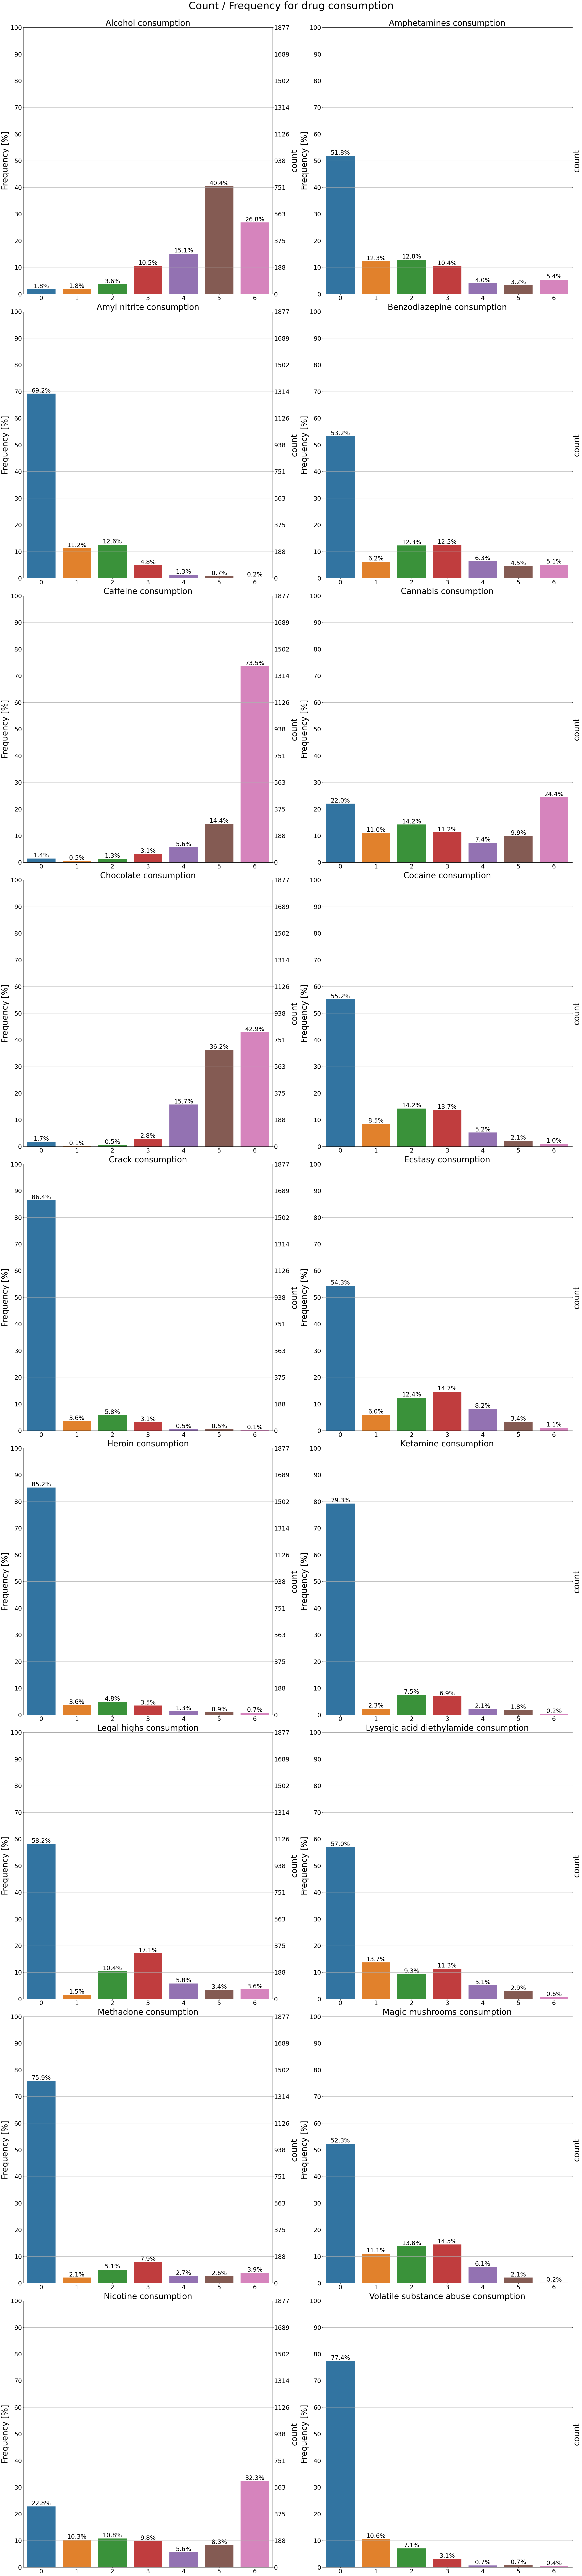

In [63]:
plot_counts(drug_data, fig_title="Count / Frequency for drug consumption\n\n\n", rotate_label=False)

**Alcohol, caffeine and chocolat** are legal stimulants that are consumed reguarly by the vast majority of respondents.

**Cannabis and nicotine** are distributed pretty evenly even if there is a higher proportion in both extremes (0 and 6 category). These two are are considered bad or ok depending on the people, so I guess this explains the about equal number of daily consummers and those who never tried it, with some in between.

**Other** drugs were never tried for the vast majority of respondents, or tried a long time ago (considered as more than a month ago)
People probably either never tried it (fear or convictions) or did it once but never again.
This also holds for legal highs, which follows the same trend as the illegal drugs.

## Correlations among drugs (using Spearman)

In [64]:
drug_data_corr_table, drug_data_pvalues = calculate_r(drug_data, drug_data, method='spearman')
display_pval_codes()
drug_data_corr_table

Significance codes: 0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Alcohol consumption  \
Alcohol consumption                                1.0 ***   
Amphetamines consumption                           -0.019    
Amyl nitrite consumption                          0.076 **   
Benzodiazepine consumption                          -0.03    
Caffeine consumption                             0.103 ***   
Cannabis consumption                                0.003    
Chocolate consumption                                0.01    
Cocaine consumption                                0.054 *   
Crack consumption                                 -0.056 *   
Ecstasy consumption                                0.039 .   
Heroin consumption                                -0.054 *   
Ketamine consumption                               0.048 *   
Legal highs consumption                              0.01    
Lysergic acid diethylamide consumption             -0.017    
Methadone consumption                            -0.08 ***   
Magic mushrooms consumption                          -0.0    
Nicotine consumption                               0.043 .   
Volatile substance abuse consumption               -0.002    

                                       Amphetamines consumption  \
Alcohol consumption                                     -0.019    
Amphetamines consumption                                1.0 ***   
Amyl nitrite consumption                              0.365 ***   
Benzodiazepine consumption                            0.505 ***   
Caffeine consumption                                     0.022    
Cannabis consumption                                  0.504 ***   
Chocolate consumption                                -0.093 ***   
Cocaine consumption                                   0.606 ***   
Crack consumption                                     0.338 ***   
Ecstasy consumption                                   0.579 ***   
Heroin consumption                                    0.382 ***   
Ketamine consumption                                  0.402 ***   
Legal highs consumption                               0.481 ***   
Lysergic acid diethylamide consumption                0.499 ***   
Methadone consumption                                 0.422 ***   
Magic mushrooms consumption                           0.484 ***   
Nicotine consumption                                  0.395 ***   
Volatile substance abuse consumption                  0.327 ***   

                                       Amyl nitrite consumption  \
Alcohol consumption                                    0.076 **   
Amphetamines consumption                              0.365 ***   
Amyl nitrite consumption                                1.0 ***   
Benzodiazepine consumption                            0.219 ***   
Caffeine consumption                                   0.061 **   
Cannabis consumption                                  0.217 ***   
Chocolate consumption                                    0.005    
Cocaine consumption                                   0.395 ***   
Crack consumption                                     0.178 ***   
Ecstasy consumption                                   0.359 ***   
Heroin consumption                                    0.169 ***   
Ketamine consumption                                  0.344 ***   
Legal highs consumption                               0.216 ***   
Lysergic acid diethylamide consumption                0.208 ***   
Methadone consumption                                 0.078 ***   
Magic mushrooms consumption                           0.236 ***   
Nicotine consumption                                  0.228 ***   
Volatile substance abuse consumption                  0.188 ***   

                                       Benzodiazepine consumption  \
Alcohol consumption                                        -0.03    
Amphetamines consumption                                0.505 ***   
Amyl nitrite consumption                                0.219 ***   
Benzodiazepine consumption          

<AxesSubplot:>

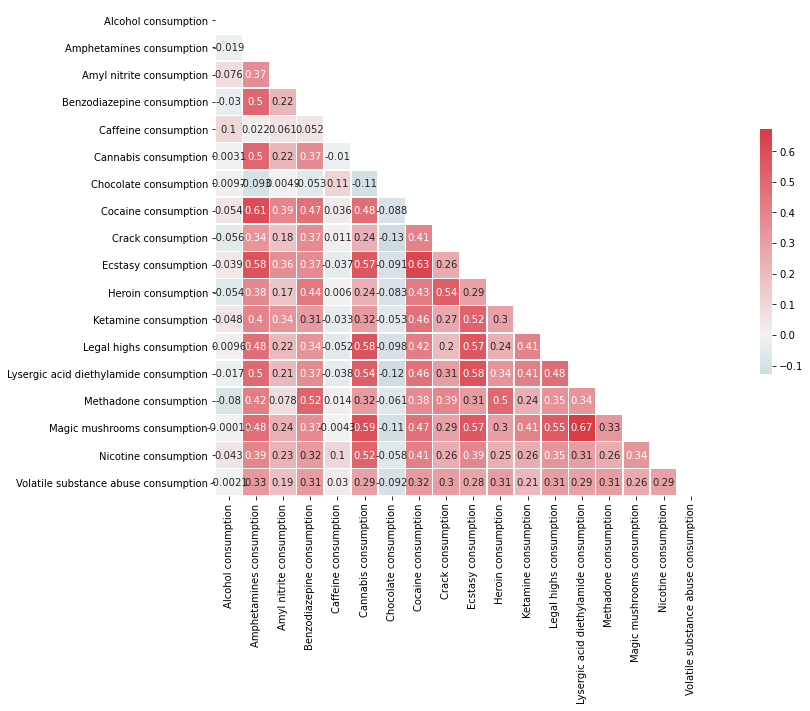

In [65]:
heatmap_corr(drug_data, method='spearman')

**Alcohol, caffeine and chocolate** don't correlate with any other drugs (too weak or insignificant relations).

There are **some moderate correlations** with high enough statistical significance.

There are **no strong correlations** (I consider an absolute value of 0.70 or above strong).

In [66]:
drug_data_corr_table_nopval, _ =  calculate_r(drug_data, drug_data, method='spearman', pvalues=False)

> Note: Below will be several very long list (every combination of drugs). Feel free to skip, I just included them because I thought it may be of some interest for some people.

**List of unsignificant correlations**

In [67]:
get_ranked_corr(drug_data_corr_table_nopval, drug_data_pvalues, corr_threshold=0, name_transform=lambda x:x.rsplit(' ', 1)[0], comp_pval= operator.gt).drop('Correlation', axis=1)

Empty DataFrame
Columns: []
Index: [Alcohol / Nicotine, Alcohol / Ecstasy, Caffeine / Lysergic acid diethylamide, Caffeine / Ecstasy, Caffeine / Cocaine, Caffeine / Ketamine, Alcohol / Benzodiazepine, Caffeine / Volatile substance abuse, Amphetamines / Caffeine, Alcohol / Amphetamines, Alcohol / Lysergic acid diethylamide, Caffeine / Methadone, Caffeine / Crack, Alcohol / Chocolate, Alcohol / Legal highs, Caffeine / Cannabis, Caffeine / Heroin, Amyl nitrite / Chocolate, Caffeine / Magic mushrooms, Alcohol / Cannabis, Alcohol / Volatile substance abuse, Alcohol / Magic mushrooms]

**List of significant weak or non-existant correlations**

In [68]:
get_ranked_corr(drug_data_corr_table_nopval, drug_data_pvalues, corr_threshold=0.3, name_transform=lambda x:x.rsplit(' ', 1)[0], comp_corr=operator.lt)

Correlation
Heroin / Magic mushrooms                                  0.298
Heroin / Ketamine                                         0.297
Nicotine / Volatile substance abuse                       0.294
Crack / Magic mushrooms                                   0.293
Lysergic acid diethylamide / Volatile substance...        0.291
Cannabis / Volatile substance abuse                       0.290
Ecstasy / Heroin                                          0.290
Ecstasy / Volatile substance abuse                        0.282
Crack / Ketamine                                          0.269
Magic mushrooms / Volatile substance abuse                0.263
Crack / Ecstasy                                           0.260
Crack / Nicotine                                          0.256
Ketamine / Nicotine                                       0.256
Methadone / Nicotine                                      0.255
Heroin / Nicotine                                         0.246
Heroin / Legal highs                                      0.244
Cannabis / Crack                                          0.240
Cannabis / Heroin                                         0.239
Amyl nitrite / Magic mushrooms                            0.236
Ketamine / Methadone                                      0.236
Amyl nitrite / Nicotine                                   0.228
Amyl nitrite / Benzodiazepine                             0.219
Amyl nitrite / Cannabis                                   0.217
Amyl nitrite / Legal highs                                0.216
Amyl nitrite / Lysergic acid diethylamide                 0.208
Ketamine / Volatile substance abuse                       0.207
Crack / Legal highs                                       0.199
Amyl nitrite / Volatile substance abuse                   0.188
Amyl nitrite / Crack                                      0.178
Amyl nitrite / Heroin                                     0.169
Chocolate / Crack                                        -0.126
Chocolate / Lysergic acid diethylamide                   -0.122
Caffeine / Chocolate                                      0.109
Cannabis / Chocolate                                     -0.108
Chocolate / Magic mushrooms                              -0.108
Alcohol / Caffeine                                        0.103
Caffeine / Nicotine                                       0.101
Chocolate / Legal highs                                  -0.098
Amphetamines / Chocolate                                 -0.093
Chocolate / Volatile substance abuse                     -0.092
Chocolate / Ecstasy                                      -0.091
Chocolate / Cocaine                                      -0.088
Chocolate / Heroin                                       -0.083
Alcohol / Methadone                                      -0.080
Amyl nitrite / Methadone                                  0.078
Alcohol / Amyl nitrite                                    0.076
Amyl nitrite / Caffeine                                   0.061
Chocolate / Methadone                                    -0.061
Chocolate / Nicotine                                     -0.058
Alcohol / Crack                                          -0.056
Alcohol / Cocaine                                         0.054
Alcohol / Heroin                                         -0.054
Benzodiazepine / Chocolate                               -0.053
Chocolate / Ketamine                                     -0.053
Benzodiazepine / Caffeine                                 0.052
Caffeine / Legal highs                                   -0.052
Alcohol / Ketamine                                        0.048

**List of significant weak to weak-moderate correlations**

In [69]:
get_ranked_corr(drug_data_corr_table_nopval, drug_data_pvalues, corr_threshold=0.5, name_transform=lambda x:x.rsplit(' ', 1)[0], comp_corr=operator.lt).query('Correlation >= 0.3').reset_index()

index  Correlation
0     Amphetamines / Lysergic acid diethylamide        0.499
1                Amphetamines / Magic mushrooms        0.484
2                    Amphetamines / Legal highs        0.481
3      Legal highs / Lysergic acid diethylamide        0.478
4                            Cannabis / Cocaine        0.477
5                     Cocaine / Magic mushrooms        0.469
6                      Benzodiazepine / Cocaine        0.467
7                            Cocaine / Ketamine        0.465
8          Cocaine / Lysergic acid diethylamide        0.464
9                       Benzodiazepine / Heroin        0.437
10                             Cocaine / Heroin        0.428
11                     Amphetamines / Methadone        0.422
12                        Cocaine / Legal highs        0.420
13                           Cocaine / Nicotine        0.414
14        Ketamine / Lysergic acid diethylamide        0.413
15                   Ketamine / Magic mushrooms        0.409
16                              Cocaine / Crack        0.406
17                       Ketamine / Legal highs        0.405
18                      Amphetamines / Ketamine        0.402
19                      Amphetamines / Nicotine        0.395
20                       Amyl nitrite / Cocaine        0.395
21                           Ecstasy / Nicotine        0.392
22                            Crack / Methadone        0.391
23                        Amphetamines / Heroin        0.382
24                          Cocaine / Methadone        0.378
25             Benzodiazepine / Magic mushrooms        0.374
26                     Benzodiazepine / Ecstasy        0.373
27                       Benzodiazepine / Crack        0.372
28                    Benzodiazepine / Cannabis        0.370
29  Benzodiazepine / Lysergic acid diethylamide        0.370
30                  Amphetamines / Amyl nitrite        0.365
31                       Amyl nitrite / Ecstasy        0.359
32                      Legal highs / Methadone        0.350
33                       Legal highs / Nicotine        0.348
34                 Benzodiazepine / Legal highs        0.345
35          Heroin / Lysergic acid diethylamide        0.345
36                      Amyl nitrite / Ketamine        0.344
37       Lysergic acid diethylamide / Methadone        0.340
38                         Amphetamines / Crack        0.338
39                   Magic mushrooms / Nicotine        0.338
40                  Methadone / Magic mushrooms        0.333
41      Amphetamines / Volatile substance abuse        0.327
42                         Cannabis / Methadone        0.322
43           Cocaine / Volatile substance abuse        0.322
44                          Cannabis / Ketamine        0.319
45                    Benzodiazepine / Nicotine        0.318
46                    Benzodiazepine / Ketamine        0.314
47    Benzodiazepine / Volatile substance abuse        0.314
48                          Ecstasy / Methadone        0.313
49            Heroin / Volatile substance abuse        0.311
50        Lysergic acid diethylamide / Nicotine        0.309
51           Crack / Lysergic acid diethylamide        0.308
52       Legal highs / Volatile substance abuse        0.308
53         Methadone / Volatile substance abuse        0.308
54             Crack / Volatile substance abuse        0.305

**List of significant moderate correlations**

In [70]:
get_ranked_corr(drug_data_corr_table_nopval, drug_data_pvalues, corr_threshold=0.4, name_transform=lambda x:x.rsplit(' ', 1)[0])

Correlation
Lysergic acid diethylamide / Magic mushrooms        0.672
Cocaine / Ecstasy                                   0.631
Amphetamines / Cocaine                              0.606
Cannabis / Magic mushrooms                          0.593
Ecstasy / Lysergic acid diethylamide                0.581
Amphetamines / Ecstasy                              0.579
Cannabis / Legal highs                              0.578
Ecstasy / Legal highs                               0.570
Cannabis / Ecstasy                                  0.566
Ecstasy / Magic mushrooms                           0.565
Legal highs / Magic mushrooms                       0.551
Cannabis / Lysergic acid diethylamide               0.542
Crack / Heroin                                      0.539
Ecstasy / Ketamine                                  0.523
Benzodiazepine / Methadone                          0.515
Cannabis / Nicotine                                 0.515
Amphetamines / Benzodiazepine                       0.505
Amphetamines / Cannabis                             0.504
Heroin / Methadone                                  0.501
Amphetamines / Lysergic acid diethylamide           0.499
Amphetamines / Magic mushrooms                      0.484
Amphetamines / Legal highs                          0.481
Legal highs / Lysergic acid diethylamide            0.478
Cannabis / Cocaine                                  0.477
Cocaine / Magic mushrooms                           0.469
Benzodiazepine / Cocaine                            0.467
Cocaine / Ketamine                                  0.465
Cocaine / Lysergic acid diethylamide                0.464
Benzodiazepine / Heroin                             0.437
Cocaine / Heroin                                    0.428
Amphetamines / Methadone                            0.422
Cocaine / Legal highs                               0.420
Cocaine / Nicotine                                  0.414
Ketamine / Lysergic acid diethylamide               0.413
Ketamine / Magic mushrooms                          0.409
Cocaine / Crack                                     0.406
Ketamine / Legal highs                              0.405
Amphetamines / Ketamine                             0.402

# Correlations between personality traits and drugs (using Spearman)

In [71]:
drug_pers_corr_table, drug_pers_pvalues = calculate_r(drug_data, pers_data, method='spearman')
drug_pers_corr_table

Neuroticism Extraversion  \
Alcohol consumption                           0.0     0.084 ***   
Amphetamines consumption                 0.135 ***     -0.042 .   
Amyl nitrite consumption                    0.04 .       0.04 .   
Benzodiazepine consumption               0.266 ***   -0.096 ***   
Caffeine consumption                        0.022        0.013    
Cannabis consumption                      0.11 ***      -0.022    
Chocolate consumption                       0.025        0.028    
Cocaine consumption                      0.144 ***       0.006    
Crack consumption                        0.118 ***     -0.052 *   
Ecstasy consumption                      0.087 ***      0.056 *   
Heroin consumption                       0.178 ***   -0.076 ***   
Ketamine consumption                     0.078 ***       0.019    
Legal highs consumption                  0.122 ***      -0.033    
Lysergic acid diethylamide consumption    0.071 **      -0.021    
Methadone consumption                    0.194 ***   -0.108 ***   
Magic mushrooms consumption               0.066 **       0.001    
Nicotine consumption                     0.133 ***      -0.033    
Volatile substance abuse consumption     0.132 ***    -0.066 **   

                                       Openness to experience Agreeableness  \
Alcohol consumption                                    0.032        -0.033    
Amphetamines consumption                            0.253 ***     -0.14 ***   
Amyl nitrite consumption                             0.065 **    -0.079 ***   
Benzodiazepine consumption                          0.225 ***    -0.164 ***   
Caffeine consumption                                   -0.02        -0.008    
Cannabis consumption                                0.417 ***    -0.155 ***   
Chocolate consumption                                 -0.015         0.038    
Cocaine consumption                                 0.205 ***    -0.183 ***   
Crack consumption                                   0.126 ***    -0.091 ***   
Ecstasy consumption                                 0.311 ***    -0.118 ***   
Heroin consumption                                  0.163 ***     -0.14 ***   
Ketamine consumption                                0.193 ***    -0.125 ***   
Legal highs consumption                             0.347 ***    -0.136 ***   
Lysergic acid diethylamide consumption              0.368 ***     -0.12 ***   
Methadone consumption                               0.209 ***    -0.153 ***   
Magic mushrooms consumption                         0.379 ***    -0.127 ***   
Nicotine consumption                                0.193 ***    -0.113 ***   
Volatile substance abuse consumption                0.151 ***    -0.125 ***   

                                       Conscientiousness Impulsiveness  \
Alcohol consumption                               0.006        0.039 .   
Amphetamines consumption                      -0.253 ***     0.294 ***   
Amyl nitrite consumption                      -0.121 ***      0.13 ***   
Benzodiazepine consumption                    -0.217 ***     0.233 ***   
Caffeine consumption                              0.006         0.014    
Cannabis consumption                          -0.293 ***     0.313 ***   
Chocolate consumption                             0.023        -0.015    
Cocaine consumption                           -0.221 ***     0.264 ***   
Crack consumption                              -0.13 ***      0.19 ***   
Ecstasy consumption                           -0.249 ***     0.272 ***   
Heroin consumption                             -0.17 ***     0.198 ***   
Ketamine consumption                          -0.167 ***     0.188 ***   
Legal highs consumption                        -0.27 ***     0.281 ***   
Lysergic acid diethylamide consumption        -0.198 ***     0.253 ***   
Methadone consumption                         -0.209 ***     0.198 ***   
Magic mushrooms consumption                   -0.221 ***     0.281 ***   
Nicot

<AxesSubplot:>

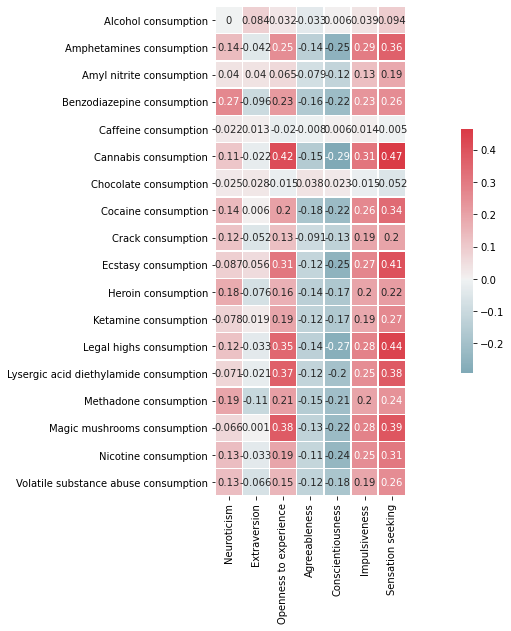

In [72]:
drug_pers_corr_table_no_pvalues, drug_pers_pvalues = calculate_r(drug_data, pers_data, pvalues=False, method='spearman')
heatmap_corr(drug_pers_corr_table_no_pvalues, ready=True, mask=False)

**Alcohol, caffeine and chocolate** consumption have no (or unsignificant) correlation with any personality trait.

For the rest of this paragraph, "drug consumption" is not taking alcohol, chocolate or caffeine into account.

**Extraversion** has no correlation with any drug, which I found surpising at first but it may be caused about my wrong understanding of extraversion.

**Agreeableness** and conscientiousness both have only very weak negative or no correlations with all the drugs. Even if the negative correlation is always a bit stronger for conscientious respondents.

**Impulsiveness** has some very weak positive correlation with every drug consumption.

**Openness to experience and sensation seeking** are the personality factors that correlate the most with drug consumption.

There are no strong correlation between personality factors and drug taking.

Also, it seems like a particular trait has either only positive or negative correlations with drug consumption.

Let's list the weak ones and above (|r| >= 0.3).

In [73]:
get_ranked_corr(drug_pers_corr_table_no_pvalues, drug_pers_pvalues, corr_threshold=0.3, against_itself=False)

Correlation
Cannabis consumption / Sensation seeking                  0.465
Legal highs consumption / Sensation seeking               0.441
Cannabis consumption / Openness to experience             0.417
Ecstasy consumption / Sensation seeking                   0.405
Magic mushrooms consumption / Sensation seeking           0.391
Lysergic acid diethylamide consumption / Sensat...        0.381
Magic mushrooms consumption / Openness to exper...        0.379
Lysergic acid diethylamide consumption / Openne...        0.368
Amphetamines consumption / Sensation seeking              0.365
Legal highs consumption / Openness to experience          0.347
Cocaine consumption / Sensation seeking                   0.340
Cannabis consumption / Impulsiveness                      0.313
Ecstasy consumption / Openness to experience              0.311
Nicotine consumption / Sensation seeking                  0.306

There are **only positive correlations** in the above list.

# Nominal correlations between demographic  and drug consumption (Cramér's V)

In [74]:
demo_drug_corr_table, demo_drug_pval = nominal_corrs(dataset, demographic_columns, drugs_columns)
demo_drug_corr_table

Alcohol consumption Amphetamines consumption  \
Age                 0.083 ***                0.196 ***   
Gender                 0.041                 0.249 ***   
Education           0.079 ***                0.122 ***   
Country              0.07 ***                0.184 ***   
Ethnicity           0.148 ***                 0.047 **   

          Amyl nitrite consumption Benzodiazepine consumption  \
Age                      0.151 ***                  0.144 ***   
Gender                   0.157 ***                  0.156 ***   
Education                  0.045 *                  0.093 ***   
Country                  0.112 ***                  0.171 ***   
Ethnicity                  0.035 .                   0.046 **   

          Caffeine consumption Cannabis consumption Chocolate consumption  \
Age                  0.093 ***             0.24 ***             0.087 ***   
Gender                    0.0             0.309 ***              0.088 **   
Education               0.033             0.166 ***               0.043 *   
Country                0.044 *            0.229 ***             0.063 ***   
Ethnicity            0.072 ***            0.088 ***                0.023    

          Cocaine consumption Crack consumption Ecstasy consumption  \
Age                 0.173 ***         0.079 ***           0.203 ***   
Gender              0.178 ***         0.151 ***           0.241 ***   
Education           0.068 ***         0.082 ***           0.125 ***   
Country             0.123 ***         0.117 ***           0.146 ***   
Ethnicity            0.047 **          0.052 **              0.029    

          Heroin consumption Ketamine consumption Legal highs consumption  \
Age                 0.11 ***            0.131 ***               0.215 ***   
Gender             0.131 ***            0.189 ***               0.327 ***   
Education          0.068 ***            0.061 ***               0.144 ***   
Country            0.136 ***            0.061 ***               0.183 ***   
Ethnicity               0.0                  0.0                 0.049 **   

          Lysergic acid diethylamide consumption Methadone consumption  \
Age                                    0.233 ***             0.117 ***   
Gender                                 0.286 ***             0.188 ***   
Education                              0.133 ***             0.106 ***   
Country                                0.213 ***             0.189 ***   
Ethnicity                              0.062 ***                0.022    

          Magic mushrooms consumption Nicotine consumption  \
Age                         0.221 ***            0.186 ***   
Gender                      0.278 ***            0.193 ***   
Education                    0.14 ***            0.131 ***   
Country                     0.203 ***            0.136 ***   
Ethnicity                   0.056 ***            0.063 ***   

          Volatile substance abuse consumption  
Age                                  0.156 ***  
Gender                               0.139 ***  
Education                            0.098 ***  
Country                              0.151 ***  
Ethnicity                            0.074 ***

<AxesSubplot:>

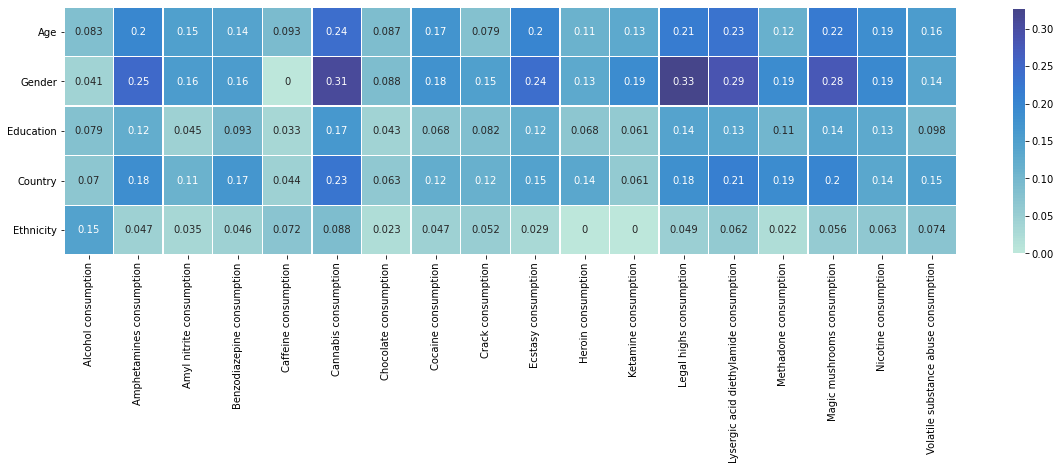

In [75]:
demo_drug_corr_table_no_pvalues, _ = nominal_corrs(dataset, demographic_columns, drugs_columns, pvalues=False)
heatmap_corr(demo_drug_corr_table_no_pvalues, ready=True, mask=False, nominal=True)

**Ethnicity** isn't correlated to drug taking, except very weakly for alcohol consumption.

**Education** also seems to be at most very weakly correlated to drug consumption.

There are **no strong or even moderate correlations**, the *strongest* weak correlations are mostly found in **Gender**.

Some drugs seems to have stronger correlations than others with several demographic features and some none at all.

Underneath is a list of the significant correlations with (|r| >= 0.2).

In [76]:
get_ranked_corr(demo_drug_corr_table_no_pvalues, demo_drug_pval, corr_threshold=0.2)

Correlation
Gender / Legal highs consumption                        0.327
Gender / Cannabis consumption                           0.309
Gender / Lysergic acid diethylamide consumption         0.286
Gender / Magic mushrooms consumption                    0.278
Gender / Ecstasy consumption                            0.241
Age / Cannabis consumption                              0.240
Age / Lysergic acid diethylamide consumption            0.233
Country / Cannabis consumption                          0.229
Age / Magic mushrooms consumption                       0.221
Age / Legal highs consumption                           0.215
Country / Lysergic acid diethylamide consumption        0.213
Age / Ecstasy consumption                               0.203
Country / Magic mushrooms consumption                   0.203

In [77]:
def diff_test(dataset, sample_attr, diff_attr, sample_attr_split='median', diff_attr_type='ordered', split_point=None, alpha=0.05):
    ''' Difference significance test on dataset.
    Returns (p of no difference,
             the group split point,
             the group 1 central,
             the group 2 central,
             a summary). <- shouldn't be in here but whatever
    
    sample_attr - column which will be divided into two samples with median value;
    diff_attr - attribute, which value will be checked in two sample groups;
    diff_attr_type - determines type of data which medians will be compared (ordered, interval)
    '''
    # In case of big data imbalance in highest rank (contains more than half)
    # It would make an empty group when splitting futher down
    if split_point is None and sample_attr_split == "median":
        levels = dataset[sample_attr].unique()
        if not (levels > dataset[sample_attr].median()).any(): # The highest level is the same as median
            split_point = levels[-1] # Split one rank lower instead
    
    if split_point is None:
        split_point = dataset[sample_attr].median() if sample_attr_split=='median' else dataset[sample_attr].mean()

    group_1 = dataset[dataset[sample_attr] > split_point]
    group_2 = dataset[dataset[sample_attr] <= split_point]
    
    group_1_diff_attr_central = group_1[diff_attr].median() if diff_attr_type=='ordered' else group_1[diff_attr].mean()
    group_2_diff_attr_central = group_2[diff_attr].median() if diff_attr_type=='ordered' else group_2[diff_attr].mean()
    
    if diff_attr_type == 'ordered':
        diff_sign, p = mannwhitneyu(group_1[diff_attr], group_2[diff_attr])
    elif diff_attr_type == 'interval':
        diff_sign, p = ttest_ind(group_1[diff_attr], group_2[diff_attr])
    else:
        raise ValueError('diff_attr_type should be one of ordered and interval')
    are = 'are' if p < alpha else 'are not'
    sample_central = 'split point' if split_point is not None else sample_attr_split
    diff_central = 'median' if diff_attr_type=='ordered' else 'mean'
    
    return (p, split_point, group_1_diff_attr_central, group_2_diff_attr_central,
            f'First group: {sample_attr} above {sample_central} value {round(split_point, 3)}\n Second group: {sample_attr} equal or below {sample_central} value {round(split_point, 6)} \n First group {diff_attr} {diff_central}: {round(group_1_diff_attr_central, 3)} \n Second group {diff_attr} {diff_central}: {round(group_2_diff_attr_central, 3)} \n Difference significance for samples: {round(diff_sign, 3)} with p-value: {round(p, 3)} \n Samples {are} statistically different.')

Let's look at the **consumption median of cannabis and legal highs consumption for female and male**, which are the two drugs most correlated with gender according to our above table.

The significance is base on the **Mann-Whitney U test**.

"*In statistics, the Mann–Whitney U test is a nonparametric test of the null hypothesis that, for randomly selected values X and Y from two populations, the probability of X being greater than Y is equal to the probability of Y being greater than X*"([Wikipedia](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test))

We implemented the difference test in the above procedure.

Here the two populations are male and female.

In [78]:
val_between_male_female = (dataset['Gender'][demo_data['Gender'] == 'Male'].iloc[0] + dataset['Gender'][demo_data['Gender'] == 'Female'].iloc[0])/ 2

In [79]:
print(diff_test(dataset, 'Gender', 'Cannabis consumption', split_point=val_between_male_female)[-1])

First group: Gender above split point value 0.0
 Second group: Gender equal or below split point value 0.0 
 First group Cannabis consumption median: 2.0 
 Second group Cannabis consumption median: 4.0 
 Difference significance for samples: 288686.5 with p-value: 0.0 
 Samples are statistically different.


In [80]:
print(diff_test(dataset, 'Gender', 'Legal highs consumption', split_point=val_between_male_female)[-1])

First group: Gender above split point value 0.0
 Second group: Gender equal or below split point value 0.0 
 First group Legal highs consumption median: 0.0 
 Second group Legal highs consumption median: 2.0 
 Difference significance for samples: 290886.5 with p-value: 0.0 
 Samples are statistically different.


Females (first group) consume less cannabis and legal highs than men.

**As a reminder**, here are the different levels for each drug:

0 - Never Used (median female legal highs consummer)

1 - Used over a Decade Ago

2 - Used in Last Decade (median female cannabis consummer, median male legal high consummer)

3 - Used in Last Year

4 - Used in Last Month (median male cannabis consummer)

5 - Used in Last Week

6 - Used in Last Day

And the values for male and female, respectively, are:

In [81]:
(dataset['Gender'][demo_data['Gender'] == 'Male'].iloc[0], dataset['Gender'][demo_data['Gender'] == 'Female'].iloc[0])

(-0.48246000000000006, 0.48246000000000006)

# Nominal correlations among demographic info and personality traits

In [82]:
demo_psycho_corr_table, demo_psycho_pvalues = nominal_corrs(dataset, demographic_columns, personality_columns)
demo_psycho_corr_table

Neuroticism Extraversion Openness to experience Agreeableness  \
Age            0.033          0.0               0.139 ***          0.0    
Gender        0.089 .       0.063               0.139 ***      0.22 ***   
Education     0.054 .       0.032               0.094 ***          0.0    
Country        0.047     0.086 ***              0.141 ***        0.036    
Ethnicity        0.0          0.0                   0.04           0.0    

          Conscientiousness Impulsiveness Sensation seeking  
Age               0.095 ***     0.103 ***         0.159 ***  
Gender            0.173 ***      0.19 ***         0.261 ***  
Education         0.112 ***     0.072 ***         0.096 ***  
Country           0.105 ***     0.098 ***         0.144 ***  
Ethnicity              0.0        0.045 *           0.046 *

<AxesSubplot:>

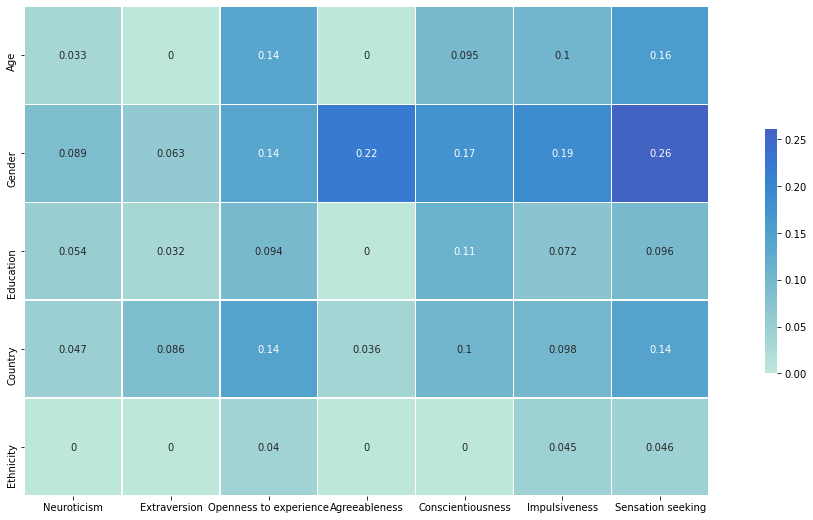

In [83]:
demo_psycho_corr_table_no_pvalues, _ = nominal_corrs(dataset, demographic_columns, personality_columns, pvalues=False)
heatmap_corr(demo_psycho_corr_table_no_pvalues, ready=True, nominal=True, mask=False)

**Neuroticism** has no statistically significant correlation with any demographic variable.

**Extraversion** has only one statistically significant correlation, with Country, which is non existent.

**Education and Ethnicity** has no correlation with any personality trait (too low or unsignificant).

**Gender** seems to have the strongest (least weak) correlations.

There are **no moderate or strong correlations**, only pretty weak ones at most.

Let's list the weak correlations (|r| > 0.15)

In [84]:
get_ranked_corr(demo_psycho_corr_table_no_pvalues, demo_psycho_pvalues, corr_threshold=0.15)

Correlation
Gender / Sensation seeking        0.261
Gender / Agreeableness            0.220
Gender / Impulsiveness            0.190
Gender / Conscientiousness        0.173
Age / Sensation seeking           0.159

Let's display the **median of Agreeableness and Sensation seeking for each gender**.

In [85]:
print(diff_test(dataset, 'Gender', 'Agreeableness', split_point=val_between_male_female)[-1])

First group: Gender above split point value 0.0
 Second group: Gender equal or below split point value 0.0 
 First group Agreeableness median: 0.288 
 Second group Agreeableness median: -0.302 
 Difference significance for samples: 327571.0 with p-value: 0.0 
 Samples are statistically different.


In [86]:
print(diff_test(dataset, 'Gender', 'Sensation seeking', split_point=val_between_male_female)[-1])

First group: Gender above split point value 0.0
 Second group: Gender equal or below split point value 0.0 
 First group Sensation seeking median: -0.216 
 Second group Sensation seeking median: 0.401 
 Difference significance for samples: 312536.0 with p-value: 0.0 
 Samples are statistically different.


**Women tend to be more agreeable and less sensation seeking than men**.

# Difference significance tests

In this section, we will split the population in 2 groups based on a feature.

All the features are rank based, we will use the **[Mann–Whitney U test](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test)** against a target, to see if the target shows a statistically significant difference in median for the two groups.

> Important: The test can show significant difference when the median values are the same. The significance means "for randomly selected values X and Y from two populations, the probability of X being greater than Y is not equal to the probability of Y being greater than X."

The **splitting point** will be the median, except if the median is also the highest rank. In this case we split one rank lower.

In the following section, **we will only show significant difference in median value for the target (and only if its value differs between the two groups)**.

> Note: The below tables will have some `Nan` values. This is because the cell has no significant difference but the column is needed for other rows.

In [87]:
def get_significant_diff_tests(dataset, samples, diff_attrs, alpha=0.05, display_same_center=False):
    samp_dfs = []
    for sample in samples:
        diff_dfs = []
        for diff_attr in diff_attrs:
            levels =  dataset[sample].unique()
            split = None
            if len(levels) == 2:
                split = (dataset[sample][dataset[sample] == levels[0]].iloc[0] + dataset[sample][dataset[sample] == levels[1]].iloc[0])/ 2
            
            p, split_point, group_1_diff_attr_central, group_2_diff_attr_central, _ = diff_test(dataset, sample, diff_attr, split_point=split, alpha=alpha)
            
            if p < alpha and (group_1_diff_attr_central != group_2_diff_attr_central or display_same_center):
                split_point = round(split_point, 5)
                diff_dfs.append(pd.DataFrame({'Median': [group_1_diff_attr_central, group_2_diff_attr_central], 'Pval / significant diff ?': [p, "Yes" if p < alpha else "No"]}, index=[f"> {split_point}", f"<= {split_point}"]))
        if diff_dfs:
            samp_dfs.append(pd.concat(diff_dfs, axis=1, keys=diff_attrs))
    
    return pd.concat(samp_dfs, axis=0, keys=samples) if samp_dfs else None

## Difference on drug consumption splitting on demographic

In [88]:
get_significant_diff_tests(dataset, demographic_columns, drugs_columns)

Alcohol consumption                            \
                                   Median Pval / significant diff ?   
Age       > -0.07854                  0.0               6.86625e-18   
          <= -0.07854                 1.0                       Yes   
Gender    > 0.0                       0.0               7.57387e-27   
          <= 0.0                      1.0                       Yes   
Education > -0.05921                  0.0               3.64336e-11   
          <= -0.05921                 1.0                       Yes   
Country   > -0.46841                  0.0               1.42147e-43   
          <= -0.46841                 2.0                       Yes   
Ethnicity > -0.31685                  1.0                 0.0109857   
          <= -0.31685                 0.0                       Yes   

                      Amphetamines consumption                            \
                                        Median Pval / significant diff ?   
Age       > -0.07854                       1.0               3.99202e-58   
          <= -0.07854                      4.0                       Yes   
Gender    > 0.0                            0.0               2.18418e-10   
          <= 0.0                           1.0                       Yes   
Education > -0.05921                       0.0               3.35628e-09   
          <= -0.05921                      1.0                       Yes   
Country   > -0.46841                       0.0               9.09757e-56   
          <= -0.46841                      3.0                       Yes   
Ethnicity > -0.31685                       2.0               4.88076e-05   
          <= -0.31685                      0.0                       Yes   

                      Amyl nitrite consumption                            \
                                        Median Pval / significant diff ?   
Age       > -0.07854                       0.0               6.02886e-46   
          <= -0.07854                      2.0                       Yes   
Gender    > 0.0                            2.0               1.05286e-39   
          <= 0.0                           4.0                       Yes   
Education > -0.05921                       2.0               1.96824e-33   
          <= -0.05921                      4.0                       Yes   
Country   > -0.46841                       2.0               1.08434e-90   
          <= -0.46841                      5.0                       Yes   
Ethnicity > -0.31685                       4.0                0.00183592   
          <= -0.31685                      3.0                       Yes   

                      Benzodiazepine consumption                            \
                                          Median Pval / significant diff ?   
Age       > -0.07854                         0.0               4.72301e-61   
          <= -0.07854                        2.0                       Yes   
Gender    > 0.0                              0.0               9.33306e-16   
          <= 0.0                             1.0                       Yes   
Education > -0.05921                         0.0               2.46717e-14   
          <= -0.05921                        1.0                       Yes   
Country   > -0.46841                         0.0               3.21921e-29   
          <= -0.46841                        2.0                       Yes   
Ethnicity > -0.31685                         0.5                0.00925687   
          <= -0.31685                        0.0                       Yes   

                      Caffeine consumption                            \
                                    Median Pval / significant diff ?   
Age       > -0.07854                   0.0               8.20003e-27   
          <= -0.07854                  2.0                       Yes   
Gender    > 0.0                        0.0               2.98859e-25   
          <= 0.0                       2.0    

## Difference on drug consumption splitting on personality traits

In [89]:
get_significant_diff_tests(dataset, personality_columns, drugs_columns)

Alcohol consumption  \
                                                Median   
Neuroticism            > 0.04257                   1.0   
                       <= 0.04257                  0.0   
Extraversion           > -0.01928                  1.0   
                       <= -0.01928                 0.0   
Openness to experience > -0.01729                  0.0   
                       <= -0.01729                 1.0   
Agreeableness          > -0.00665                  0.0   
                       <= -0.00665                 1.0   
Conscientiousness      > -0.21712                  1.0   
                       <= -0.21712                 0.0   
Impulsiveness          > 0.07987                   2.0   
                       <= 0.07987                  0.0   

                                                              \
                                   Pval / significant diff ?   
Neuroticism            > 0.04257                 3.73446e-10   
                       <= 0.04257                        Yes   
Extraversion           > -0.01928                9.45105e-22   
                       <= -0.01928                       Yes   
Openness to experience > -0.01729                 9.5369e-07   
                       <= -0.01729                       Yes   
Agreeableness          > -0.00665                1.07597e-24   
                       <= -0.00665                       Yes   
Conscientiousness      > -0.21712                1.85149e-27   
                       <= -0.21712                       Yes   
Impulsiveness          > 0.07987                 4.56946e-43   
                       <= 0.07987                        Yes   

                                   Amphetamines consumption  \
                                                     Median   
Neuroticism            > 0.04257                        2.0   
                       <= 0.04257                       0.0   
Extraversion           > -0.01928                       2.0   
                       <= -0.01928                      0.0   
Openness to experience > -0.01729                       0.0   
                       <= -0.01729                      1.0   
Agreeableness          > -0.00665                       0.0   
                       <= -0.00665                      1.0   
Conscientiousness      > -0.21712                       1.0   
                       <= -0.21712                      0.0   
Impulsiveness          > 0.07987                        2.0   
                       <= 0.07987                       0.0   

                                                              \
                                   Pval / significant diff ?   
Neuroticism            > 0.04257                 6.09326e-25   
                       <= 0.04257                        Yes   
Extraversion           > -0.01928                5.16573e-19   
                       <= -0.01928                       Yes   
Openness to experience > -0.01729                3.31557e-10   
                       <= -0.01729                       Yes   
Agreeableness          > -0.00665                1.32684e-14   
                       <= -0.00665                       Yes   
Conscientiousness      > -0.21712                5.15416e-17   
                       <= -0.21712                       Yes   
Impulsiveness          > 0.07987                 2.01287e-20   
                       <= 0.07987                        Yes   

                                   Amyl nitrite consumption  \
                                                     Median   
Neuroticism            > 0.04257                        3.0   
                       <= 0.04257                       2.0   
Extraversion           > -0.01928                       4.0   
                       <= -0.01928                      2.0   
Openness to experience > -0.01729                       2.0   
                       <= -0.01729                      3.0   
Agreeableness          > -0.00665        

## Difference on personality traits splitting on demographic

In [90]:
get_significant_diff_tests(dataset, demographic_columns, personality_columns)

Agreeableness                            \
                             Median Pval / significant diff ?   
Age       > -0.07854       -0.21712               1.33252e-14   
          <= -0.07854       0.19268                       Yes   
Gender    > 0.0             0.28783               3.29591e-22   
          <= 0.0           -0.30172                       Yes   
Education > -0.05921        0.25953               4.18095e-25   
          <= -0.05921      -0.27607                       Yes   
Country   > -0.46841        0.13136               4.98797e-06   
          <= -0.46841      -0.15487                       Yes   
Ethnicity > -0.31685            NaN                       NaN   
          <= -0.31685           NaN                       NaN   

                      Conscientiousness                            \
                                 Median Pval / significant diff ?   
Age       > -0.07854           -0.21575               2.49039e-39   
          <= -0.07854           0.40148                       Yes   
Gender    > 0.0                 0.25953               3.99886e-17   
          <= 0.0               -0.27607                       Yes   
Education > -0.05921           -0.21712               3.67354e-11   
          <= -0.05921           0.19268                       Yes   
Country   > -0.46841            0.12331               1.02121e-14   
          <= -0.46841          -0.27607                       Yes   
Ethnicity > -0.31685                NaN                       NaN   
          <= -0.31685               NaN                       NaN   

                      Extraversion                           Impulsiveness  \
                            Median Pval / significant diff ?        Median   
Age       > -0.07854     -0.247775               8.26174e-20           NaN   
          <= -0.07854     0.141430                       Yes           NaN   
Gender    > 0.0           0.003320                0.00280414      -0.21712   
          <= 0.0         -0.154870                       Yes       0.19268   
Education > -0.05921      0.167670                1.6557e-05      -0.21575   
          <= -0.05921    -0.154870                       Yes       0.07987   
Country   > -0.46841      0.003320               2.45451e-05      -0.21712   
          <= -0.46841    -0.154870                       Yes       0.19268   
Ethnicity > -0.31685      0.529750                0.00134618           NaN   
          <= -0.31685    -0.217120                       Yes           NaN   

                                                Neuroticism  \
                      Pval / significant diff ?      Median   
Age       > -0.07854                        NaN    -0.14882   
          <= -0.07854                       NaN     0.13606   
Gender    > 0.0                     8.88318e-15     0.04257   
          <= 0.0                            Yes    -0.05188   
Education > -0.05921                6.16827e-12    -0.10035   
          <= -0.05921                       Yes     0.04257   
Country   > -0.46841                1.37205e-19    -0.14882   
          <= -0.46841                       Yes     0.31287   
Ethnicity > -0.31685                        NaN     0.14143   
          <= -0.31685                       NaN    -0.01928   

                                                Openness to experience  \
                      Pval / significant diff ?                 Median   
Age       > -0.07854                6.00408e-08                0.25953   
          <= -0.07854                       Yes               -0.14277   
Gender    > 0.0                      0.00322451               -0.17779   
          <= 0.0                            Yes                0.14143   
Education > -0.05921                0.000111532                0.13136   
          <= -0.05921                       Yes               -0.01729   
Country   > -0.46841                1.12553e-11               -0.17779   
          <= -0.46841                       Yes     

# Choosing a split for Consummer vs Non consummer binarization of targets

In practice, we are more interested in predicting which drugs an individual user consumes and less in knowing how long it has been.

We want to regroup the different levels we currently have for each drug into two classes: User and Non-User.

We are going to **compare year and decade based splits**.

- Year based: Consummer = Used in last year
- Decade based: Consummer = Used in last decade

In [91]:
dataset_decade = dataset.copy()
for i in drugs_columns:
    dataset_decade[i] = ["Consummer" if c < 2 else "Non consummer" for c in dataset[i]]
    
dataset_year = dataset.copy()
for i in drugs_columns:
    dataset_year[i] = ["Consummer" if c < 3 else "Non consummer" for c in dataset[i]]
    
compare_year_decade = pd.concat([dataset_decade.assign(split="decade"), dataset_year.assign(split="year")])

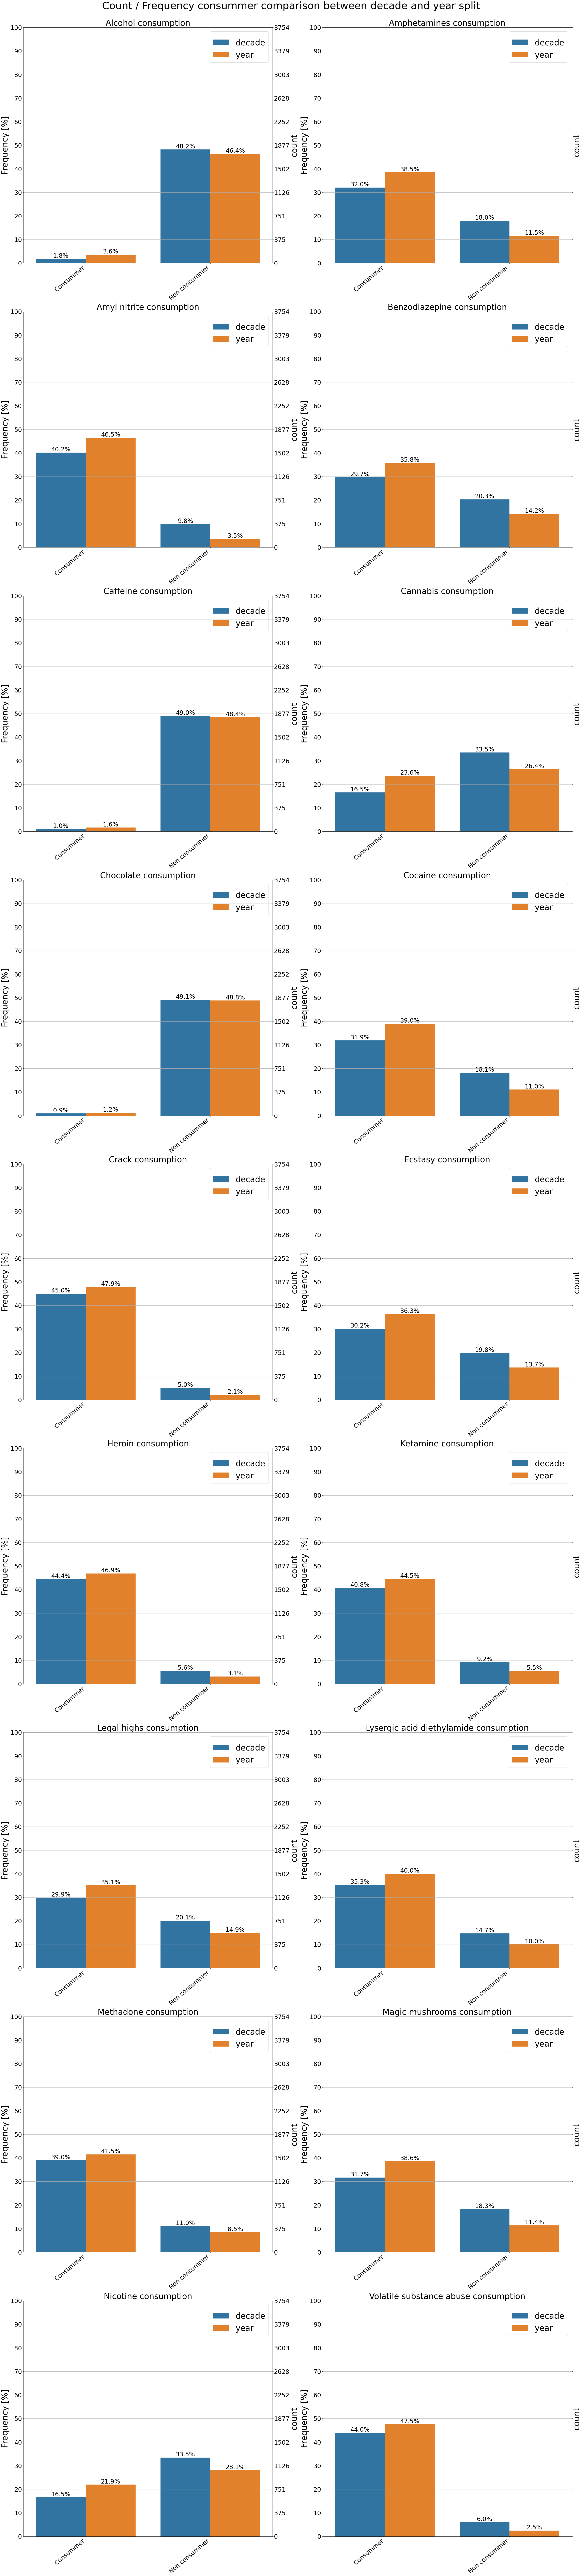

In [92]:
plot_counts(compare_year_decade, drugs_columns, add_args={"hue": "split"}, fig_title="Count / Frequency consummer comparison between decade and year split\n\n\n")

> Note: Since we duplicated our original dataset, you can get the correct percentage for a split (decade or year) by doubling the value. This will also double the gap between the two splits !

Appart from Alcohol, Caffeine, Cannabis and Chocolate consumption (it doesn't change that much anyways for these), **the decade based split is more balanced**.

We will choose the **decade based split for model training and inference**.

# Model training

In [93]:
from sklearn.multiclass import OneVsRestClassifier

from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, Matern
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, multilabel_confusion_matrix, f1_score, precision_score, recall_score, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import sklearn

Removing Country from features since we want to be able to infere for people from any country later on.

In [94]:
feature_columns.remove("Country")

Binary decade based user (1), non-user (0) dataset.

In [95]:
for i in drugs_columns:
    dataset_decade[i] = [0 if c < 2 else 1 for c in dataset[i]]

In [96]:
dataset_decade.head()

Age   Gender  Education  Country  Ethnicity  Neuroticism  \
ID                                                                 
1   0.49788  0.48246   -0.05921  0.96082    0.12600      0.31287   
2  -0.07854 -0.48246    1.98437  0.96082   -0.31685     -0.67825   
3   0.49788 -0.48246   -0.05921  0.96082   -0.31685     -0.46725   
4  -0.95197  0.48246    1.16365  0.96082   -0.31685     -0.14882   
5   0.49788  0.48246    1.98437  0.96082   -0.31685      0.73545   

    Extraversion  Openness to experience  Agreeableness  Conscientiousness  \
ID                                                                           
1       -0.57545                -0.58331       -0.91699           -0.00665   
2        1.93886                 1.43533        0.76096           -0.14277   
3        0.80523                -0.84732       -1.62090           -1.01450   
4       -0.80615                -0.01928        0.59042            0.58489   
5       -1.63340                -0.45174       -0.30172            1.30612   

    ...  Ecstasy consumption  Heroin consumption  Ketamine consumption  \
ID  ...                                                                  
1   ...                    0                   0                     0   
2   ...                    1                   0                     1   
3   ...                    0                   0                     0   
4   ...                    0                   0                     1   
5   ...                    0                   0                     0   

    Legal highs consumption  Lysergic acid diethylamide consumption  \
ID                                                                    
1                         0                                       0   
2                         0                                       1   
3                         0                                       0   
4                         0                                       0   
5                         0                                       0   

    Methadone consumption  Magic mushrooms consumption  Nicotine consumption  \
ID                                                                             
1                       0                            0                     1   
2                       1                            0                     1   
3                       0                            0                     0   
4                       0                            0                     1   
5                       0                            1                     1   

    Fictitious drug Semeron consumption  Volatile substance abuse consumption  
ID                                                                             
1                                     0                                     0  
2                                     0                                     0  
3                                     0                                     0  
4                                     0                                     0  
5                                     0                                     0  

[5 rows x 31 columns]

Splitting our dataset into train (for training), validation (for hyperparameter tuning) and test (for final performance mesure).

In [97]:
data_train, data_test = train_test_split(dataset_decade, test_size=0.2, random_state=11)

In [98]:
data_train, data_val = train_test_split(data_train, test_size=0.3, random_state=11)

In [99]:
data_train.shape, data_val.shape, data_test.shape

((1050, 31), (451, 31), (376, 31))

# Choosing a classifier

## Classifier Chains

A chain of binary classifiers C0, C1, . . . , Cn is constructed, where a classifier Ci uses the predictions of all the classifier Cj , where j < i. This way the method, also called classifier chains (CC), can take into account label correlations.

> Warning: The total number of classifiers needed for this approach is equal to the number of classes, but the training of the classifiers is more involved.

## Metrics

**Accuracy**

In scikit-learn, `accuracy_score`: "*The set of labels predicted for a sample must *exactly* match the corresponding set of labels in y_true.*". This is also know as **Exact Match Ratio**.

I also made my own accuracy metric, called `avg_individual_accuracy` which is the average proportion of correct predictions (wether positive or negative).

In [100]:
def avg_individual_accuracy(actual, pred):
    return (actual == pred).sum(axis=1).mean() / actual.shape[1]

**Precision**: the average proportion of correct positive labels to the total number of predicted positives.

**Recall**: the average proportion of predicted positives to the number of actual positives.

**F1 measure**: "*The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal.*"([scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html))

`F1 = 2 * (precision * recall) / (precision + recall)`

**Miss Rate (also called False negative rate)**: the proportion of false negatives against actual positives. (the lower the better)

In [101]:
def miss_rate(actual, predictions): # Calculates miss_rate for each drug
    cm = multilabel_confusion_matrix(actual, predictions)
    tp = cm[:, 1, 1]
    fn = cm[:, 1, 0]
    cond_pos = tp + fn
    cond_pos[cond_pos == 0] = 1
    return (fn / cond_pos)

def avg_miss_rate(actual, predictions): # mean miss rate
    return miss_rate(actual, predictions).mean()

# Scorer
miss_rate_scorer = make_scorer(avg_miss_rate, greater_is_better=False)

We want to use the later to choose / fit our models, since inherently we want to be sure not to miss drug users and classify them as non-user!

Plus, since some drugs have very few users, we don't want our model to be optimized based on accuracy (or any true positive based metric) since predicting everyone as non-user would give a high accuracy, but again I feel like it is not our priority here.

> Tip: `miss_rate_scorer` will be used to calculate the score in `GridSearchCV` later on.

## Trying out several models

In [102]:
names = ["Nearest Neighbors", "SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA", "LDA"]

classifiers = [KNeighborsClassifier(),
    SVC(),
    GaussianProcessClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    LinearDiscriminantAnalysis()]

prefix = "estimator__"

grid_knn = {prefix+'n_neighbors': [9, 11, 13], prefix + 'weights': ['uniform', 'distance'], prefix+'metric': ['minkowski', 'euclidean', 'manhattan']}
grid_svc = {prefix+'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], prefix+'C':[0.5, 1, 3, 5, 7]}
grid_gaussian_pro = {prefix+'kernel':[1.0 * RBF(1.0), 1.0 * Matern(1.0)]}
grid_dt = {prefix+'max_depth': [None, 2, 3, 5]}
grid_rf = {prefix+'max_depth' : [None, 8, 10, 12], prefix+'n_estimators': [30, 42, 58], prefix+'max_features': ['auto', 1, 5, 7]}
grid_mlp = {prefix+'alpha': [0.00001, 0.0001, 0.001, 0.01], prefix+'max_iter': [10, 30, 50, 100]}
grid_boost = {prefix+'n_estimators': [20, 30, 40, 50], prefix+'learning_rate': [0.1, 0.25, 0.5, 1.0]}
grid_gaussian = {prefix+'var_smoothing': np.logspace(1, -9, num=20)}
grid_QDA = dict()
grid_LDA = dict()

grids = [
    grid_knn,
    grid_svc,
    grid_gaussian_pro,
    grid_dt,
    grid_rf,
    grid_mlp,
    grid_boost,
    grid_gaussian,
    grid_QDA,
    grid_LDA
]

`classifiers` is a list of classifiers we want to try out and `grids` is a list of hyperparameters grids to try out.

## OneVSRest

We decompose the multilabel classification problem into multiple independent binary classification problems.

> Warning: This will not use correlation between targets for training and inference.

In [103]:
OvR_classifiers = [OneVsRestClassifier(classifier, n_jobs=-1) for classifier in classifiers]

## Training our models

In [104]:
def classifier_comparison(classifiers, grids, data, features, targets):
    tuned = []
    for classifier, grid in zip(classifiers, grids):
        clf = GridSearchCV(classifier, grid, scoring='f1_samples')
        clf.fit(data[features], data[targets])
        tuned.append(clf)
    return tuned

In [105]:
%%time
results = classifier_comparison(OvR_classifiers, grids, data_train, feature_columns, drugs_columns)

CPU times: user 3min 3s, sys: 7.61 s, total: 3min 10s
Wall time: 9min 53s


**Tuning every model with hyperparameter grid search and 5-fold cross validation**.

## Model comparison

In [106]:
def choose_best_model(models, names, dataset, features, targets, verbose=True):
    best_score = 1
    best_model_ind = -1
    preds = None
    for index, (name, model) in enumerate(zip(names, models)):
        predictions = model.predict(dataset[features])
        score = avg_miss_rate(dataset[targets], predictions)
        if score < best_score:
            best_score = score
            best_model_ind = index
            preds = predictions
        if verbose:
            print(name)
            print(f"Miss Rate score: {score}")
            print("\n***************\n")
    
    best_model_name = names[best_model_ind]
    best_model = models[best_model_ind]
    if verbose:
        print(f"The best model is {best_model_name} with miss rate score {best_score} and parameters:\n {best_model.best_params_}")
    return best_model_name, best_model, preds

In [107]:
name, classifier, predictions = choose_best_model(results, names, data_val, feature_columns, drugs_columns)

Nearest Neighbors
Miss Rate score: 0.4860856546209625

***************

SVM
Miss Rate score: 0.5177092943429245

***************

Gaussian Process
Miss Rate score: 0.5036630902824558

***************

Decision Tree
Miss Rate score: 0.5098608623010885

***************

Random Forest
Miss Rate score: 0.516828635750255

***************

Neural Net
Miss Rate score: 0.5115424635390232

***************

AdaBoost
Miss Rate score: 0.508900409479383

***************

Naive Bayes
Miss Rate score: 0.4732610339188714

***************

QDA
Miss Rate score: 0.44167071203785757

***************

LDA
Miss Rate score: 0.5068340666013148

***************

The best model is QDA with miss rate score 0.44167071203785757 and parameters:
 {}


Seems like **QDA was the best at minimizing Miss Rate**!

> Tip: I trained the same models previously using f1 score and QDA wasn't one of the top ranked ones even though they were all quite close. This means a model is "the best" based on a metric and this can vary with the metric.

In [108]:
print(classification_report(data_val[drugs_columns], predictions, target_names=drugs_columns, zero_division=0))

                                        precision    recall  f1-score   support

                   Alcohol consumption       0.97      0.99      0.98       434
              Amphetamines consumption       0.58      0.61      0.60       158
              Amyl nitrite consumption       0.32      0.38      0.35        90
            Benzodiazepine consumption       0.55      0.49      0.52       177
                  Caffeine consumption       0.99      0.98      0.99       446
                  Cannabis consumption       0.84      0.80      0.82       294
                 Chocolate consumption       0.98      0.99      0.99       443
                   Cocaine consumption       0.52      0.46      0.49       156
                     Crack consumption       0.38      0.07      0.11        46
                   Ecstasy consumption       0.64      0.72      0.68       163
                    Heroin consumption       0.22      0.11      0.14        46
                  Ketamine consumption 

For rarely consumed drugs such as heroin or cocaine, the precision, recall and f1-score are quite bad.

This is understandable:
- **Precision** : By optimizing miss rate, we predict individual as consummers more easily (in the sense more often). Meaning our proportion of true positive compared to predicted positive is low (lots of false positives).
- **Recall** : But still, even though we predict more positives and we may have slightly more true positives by using miss rate, they are so few users of these drugs (number is given by the *support* column) that we most often predict individuals as non-user when they actually are. That's why our rate true positive compared to actual positives is low.
- **F1-score**: mix of the previous two.

In [109]:
accuracy_score(data_val[drugs_columns], predictions)

0.10864745011086474

> Important: Accuracy is not that high, actually it is lower than when I trained with f1 score. As I said before, we chose trading off accuracy in order to minimize miss rate. Our model doesn't want to miss out on drug users but this means it classifies individuals as drug consummer a bit too easily.

In [110]:
avg_individual_accuracy(data_val[drugs_columns], predictions)

0.794530672579453

# Using model for inference

## Evaluation on the test set

> Warning: These steps means we finished training our model. You can't go back after seeing the results and tune the hyperparameters or choose another model, since the result would be biased towards the test set. This is purely to get an idea of our model's real inference power.

In [111]:
test_predictions = classifier.predict(data_test[feature_columns])

**Accuracy (Exact Match Ratio)**

In [112]:
accuracy_score(data_test[drugs_columns], test_predictions)

0.13297872340425532

**Accuracy (My accuracy)**

In [113]:
avg_individual_accuracy(data_test[drugs_columns], test_predictions)

0.7978723404255319

**Precision**

In [114]:
precision_score(data_test[drugs_columns], test_predictions, average='samples')

0.8240121856224015

**Recall**

In [115]:
recall_score(data_test[drugs_columns], test_predictions, average='samples')

0.783358996465223

**F1 score**

In [116]:
f1_score(data_test[drugs_columns], test_predictions, average='samples')

0.7686327089891705

**Report with metrics for every drug**

In [117]:
print(classification_report(data_test[drugs_columns], test_predictions, target_names=drugs_columns, zero_division=0))

                                        precision    recall  f1-score   support

                   Alcohol consumption       0.97      0.98      0.98       366
              Amphetamines consumption       0.60      0.67      0.63       138
              Amyl nitrite consumption       0.33      0.41      0.36        69
            Benzodiazepine consumption       0.62      0.51      0.56       162
                  Caffeine consumption       0.98      0.98      0.98       368
                  Cannabis consumption       0.89      0.85      0.87       264
                 Chocolate consumption       0.99      0.98      0.99       371
                   Cocaine consumption       0.63      0.51      0.56       146
                     Crack consumption       0.33      0.05      0.09        39
                   Ecstasy consumption       0.66      0.75      0.70       155
                    Heroin consumption       0.31      0.08      0.13        49
                  Ketamine consumption 

In [118]:
pd.DataFrame(miss_rate(data_test[drugs_columns], test_predictions), index=drugs_columns, columns=["Miss rate"])

Miss rate
Alcohol consumption                      0.019126
Amphetamines consumption                 0.333333
Amyl nitrite consumption                 0.594203
Benzodiazepine consumption               0.487654
Caffeine consumption                     0.021739
Cannabis consumption                     0.151515
Chocolate consumption                    0.016173
Cocaine consumption                      0.493151
Crack consumption                        0.948718
Ecstasy consumption                      0.251613
Heroin consumption                       0.918367
Ketamine consumption                     0.647059
Legal highs consumption                  0.288344
Lysergic acid diethylamide consumption   0.392523
Methadone consumption                    0.647727
Magic mushrooms consumption              0.313433
Nicotine consumption                     0.203187
Volatile substance abuse consumption     0.809524

## Model persistence

We usually save our serialized model object in the Pickle (.pkl) format, but as [specified by scikit-learn](https://scikit-learn.org/stable/modules/model_persistence.html), it may be best in our case to save it as a joblib

In [119]:
from joblib import dump, load

In [120]:
dump(classifier, 'trained_classifier.joblib')

['trained_classifier.joblib']

**And with that we are done!**